# Customer Segmentation Using Machine Learning

Capstone Project for Springboard Intensive Data Science Course

Julianna Renaud

## The Project

According to an article published by Joshua Saxon on the American Marketing Association (AMA) website, in 2017, "the average consumer is exposed to up to 10,000 brand messages a day." Brands and marketers are challenged more than ever before to have their message break through the clutter, resonate and initiate a response for their brand. Marketers are challenged with achieving their KPIs such as increasing their Return on Ad Spend (ROAS), increasing Conversion Rate (CVR), in a world where they must fight even harder than ever before for the consumer's attention.

By understanding who their customers are and the behavior of those customers, marketers have a better chance of breaking through the clutter with their message. Additionally, marketers can begin to have increased success with acquisition campaigns through more targeted look-a-like campaigns when they leverage data from their best customers. 

This project utilizes machine learning to create customer segments based on historical purchase data.


## The Client

The client for this project is a fashion retailer selling men's, women's and children's clothing and accessories. This client operates both eCommerce and retail business, while also having a large percentage of product sales coming from third party retailers. This project focuses on the client's eCommerce business and utilizes data only from the client's eCommerce sales.

*For confidentiality purposes, the name of this client will remain anonymous. The client will be referred to as “the Client” throughout.*


## The Data

The client imports purchase data into their Email Service Provider (ESP). For the sake of anonymity, data was pulled using a unique Subscriber ID assigned by the ESP. No Personally Identifiable Information (PII) was utilized. Subscriber ID was utilized in lieu of email address. City and state data were pulled for location of purchase, but not billing or shipping addresses. No payment data was utilized.

The purchase data is from xx/xx/20xx through xx/xx/20xx. 

The following files were pulled using SQL queries from the ESP:
* Account Master: A complete list of all SubscriberIDs (Dates: xx/xx/20xx through xx/xx/20xx)
* Products File for:  Product details such as category, sub-category, etc.
* Purchase File for: Purchase details such as Order ID, Product ID (SKU), Subscriber ID (purchaser)
* Subscriber Status for: Determining if the Subscriber is subscribed to the client's email program
* Sent Count for: The total number of emails sent to the subscriber in the last six months
* Open Count for: The total number of email opens (a measure of engagement with email program) in the last six months (max open date xx/xx/20xx)
* Click Count for: The total number of email clicks (a measure of engagement with email content) in the last six months (max click date xx/xx/20xx)


## Methodology

This project was treated as an unsupervised learning clustering problem. Both Mini-Batch KMeans and KMeans clustering techniques were originally applied to the dataset, but KMeans clustering was applied below for the final determination of cluster assignment. The number of clusters was determined using the Elbow Method to graph the Distortion Value on the Y axis for the number of clusters in the range two through ten.

The final dataset was scaled using the StandardScaler() method from scikit learn prior to running the data through the MiniBath KMeans and KMeans algorithms.

### Libraries:

* pandas for: data loading, wrangling, cleaning and manipulation, descriptive statistics
* datetime for: converting date columns into the appropriate format
* numpy for: array data structure, mathematical/statistical analysis
* sklearn for: data preprocessing, clustering, PCA
* matplotlib for: data visualization
* seaborn for: data visualization
* mpl_toolkits for: data visualization
* scipy for: clustering

### Data Wrangling and Cleaning

The data came in the form of CSV files which were loaded into pandas data frames. Files that contained data deemed "identifiable" that could have potentially compromised the anonymity of this product were anonymized within a separate jupyter notebook prior to being utilized in the code below.

High level details of data wrangling/cleaning steps are below with additional file specific data wrangling/cleaning details following:

* Date fields required proper formatting.
* Missing data was handled in a variety of different ways depending upon the field (specifics are included within the file specific details below).
* Create numeric categorical columns from text columns
* Create calculated fields to compare Subscriber behavior 
* Pivoting was necessary to create a master file that contained only one row for each Subscriber ID. Some of the data needed to be pivoted and summed (i.e. quantity of products orders, order value). Some of the data needed to be pivoted and the max value taken (i.e. order date)

#### Account Master: This file originally contained 20 columns.
* Only six of the 20 columns did not contain null data. After analyzing columns with null data, it was determined that most of the columns contained in this file were not indicators of the customer's shopping behavior. All but three columns were dropped from this file. 
* The few fields that were binary indicators of self-selected preferences only contained "True" values for approximately 4% of all Subscriber IDs. These columns were removed due to their uneven distribution of T/F entries.
* From this file, Subscriber ID, First and Last Purchase Dates are the three columns that remained.

#### Email Data Files (Subscriber Status, Sent Count, Open Count, Click Count)
* None of these individual files contained any missing data. Data cleaning was minimal for these files.
* The Subscriber Status file only contained one record with an "Unsubscribed" status. This one record was removed. If the Subscriber ID turns out to match with a Subscriber ID on the Purchase File, then it will be classified as "Not an Email Subscriber" in a subsequent step.
* These four files were joined (outer join) to create a wholistic email view of the Subscriber ID.
* Engagement metrics were calculated (Open Rate, Click Rate, Click to Open Rate) since the counts are only relative when compared to the number of campaigns received (i.e. a subscriber whose opened 10 emails, but has received 20 is very different than one whose opened 10 emails, but has received 100).
* The original columns for Sent Count, Open Count and Click Count were then subsequently dropped.
* Missing data was replaced with "0".

#### Email Data Files Combined with Account Master
* The Account Master and combined email file were joined (outer join).
* There were some records that were not on the Account Master file and therefore did not have a First or Last Purchase Date. Those columns with missing data were filled with "0".

#### Products File: This file originally contained 24 columns.
* Only four of the 24 columns did not contain null data. All but five columns were dropped from this file. Four columns did not contain any data and were immediately dropped altogether. Except for the five columns, it was determined that the remaining columns contained product details that were too granular for use in clustering.
* From this file, Product ID, Product Department, Product Department Size (i.e. Regular, Plus, Toddler, etc.), Product Category, and Product Brand are the five columns that remained. Product ID was kept, because it was the necessary field for joining the Product File the Purchase File.

#### Purchase File: This file originally contained 19 columns.
* Only three of the 19 columns contained null data. 
* Zip Code column contained missing data and was determined to be too granular for customer clustering and was dropped altogether.
* Product Quantity was missing from 1,364 rows. After running the mean, median and mode for this column, it was determined to replace missing values with 1. The mean was 1.48, the mode was 1.0 and the Median was 1.0 and since someone can only purchase products in whole numbers, 1 was determined to be the best fit for missing data.
* State was the other column with missing data. Since the brand only promotes US shipping on the website, and 99.82% of the rows contained "US" in the country field, I dropped all rows that did not contain "US" with the country column. Since all of the rows that were missing state date had something other than "US" in the country column this resolved the missing data issue for state.
* Upon further investigation into the state column, there was six state codes that I did decide to drop (AA, AP, MP, PR, VI, and AE). The majority of these are overseas military addresses. While valid state codes, I determined that there were not enough rows from these military "states" and that it would be more insightful to analyze customers from within the traditional 50 states.
* In addition to dropping zip code (noted above), other columns were determined to either contain data too granular for clustering or to contain data irrelevant to consumer behavior (such as shipping charge and insert date).
* Eleven of the 19 columns were maintained from this file.

#### Products File Combined With Purchase File
* The Product File and Purchase files were joined based on the Product ID
* After joining the files, it was determined that there were some products that were on the Purchase File that were missing Product Size and Product Brand data. Through further analysis of products with null values, it was determined that the best way to handle these missing values was to replace them with a "No Size" and "No Brand". Most of these products were items such as accessories where size is not applicable.

#### Combined Product & Purchase File was Joined to the Combined Email & Account Master File
After joining all of the files together into one large data frame, some additional cleanup was necessary:
* Filled any null values with "0"
* Created a binary "PromoUsed" column populated with a 1 if either a Product or Shipping promo was used in the purchase
* Created numeric categorical columns from text columns. Consolidated some of the categories when appropriate. For example, Department Category of "Jackets" was consolidated with "Jackets & Outerwear".
* Multiplied the categorical columns by the product quantity purchased in that row for the category (this is necessary for rows with multiples of the same product were purchased in the same order to have an accurate sum of products purchased by category when pivoting the data).

#### Pivot the Data to Create a Data Frame with a single row by SubscriberID
* Create recency by number of days columns. Convert data columns into relevant number of days columns that provide indication of how recently the subscriber performed the activity (i.e. number of days since most recent purchase)
* Create a DataFrame with one row per Order ID
* Utilize the new DataFrame to calculate the total number of orders the Subscriber ID has made in their lifetime
* Create a Data Frame that calculates number of products purchased, LTV, number of products purchased in each category, number of orders a promo code was used, number of orders made for each state, etc. by SubscriberID.
* Calculate AOV, UPT and Promo Use Percentage (percentage of total orders a promo code was used, i.e. how much of a promotional shopper are they) by SubscriberID
* Rejoin the files to create a DataFrame with a single row for each subscriber

#### Post EDA Data Wrangling
During EDA it was uncovered that Product Department, Product Category and Product Size were all heavily skewed to one department, one category and one size respectively. These columns are sums of the number of products purchased by the subscriber for the department, category and size. Rather than removing these columns altogether and losing the insight into cross department, cross category and cross size purchase behavior, these features were consolidated in only two options. For example, for Product Department, the final dataset contained two columns, Mens and Not Mens. Contents of these two columns are the percentage of the number of products purchased by that subscriber that are from the Mens Department and the percentage of the number of products purchased by that subscriber from any other department (the total of the two columns equals 100%). The product category and product size fields were consolidated using the same strategy.

Product Brand data was also handled similarly to the strategy above, but rather than two features, this data was consolidated into five features, Brand W, Brand Reg, Brand FS, No Brand and Other Brand. The sum of these five columns equals 100% for any unique Subscriber ID.

Additionally, there were two states that accounted for 21% of all orders. Since the state data was too granular for segmentation, I utilized the five-region regional breakdown of the United States to consolidate the state data. The contents of each of these five columns is the total number of orders made from that region for each subscriber. The sum of the five columns for each subscriber equals the subscriber's frequency (or order total) count.

Email engagement was not as strong as I'd anticipated. Rather than keeping the recency of open or the recency of click data and the rates, two new binary columns were created. These columns contain a 1 if the subscriber has opened or clicked (respectively) an email in the last 6 months and 0 if not. Additionally, since by default a 0 in the Email Active column means that the Subscriber is either not emailable (as in unsubscribed, not subscribed, held, or bounced) and the counts of the held, bounced and not subscribed columns were minimal, the held, bounced and not subscribed columns were dropped, just leaving a binary "Email Active" column.


### Exploratory Data Analysis (EDA)

Purpose: Gain insight into the final dataset and begin to understand the following:
* Uncover the underlying structure of the data
* Identify if there are any features that may be imbalanced

Overview of Tasks Performed:
* Identified the percentage of SubscriberIDs that have never made a purchase 
* Split the data into two Data Frames, purchasers and non-purchasers (for the purposes of this project we will cluster purchasers) 
* Identified and removed SubscriberIDs that are outliers based on their LTV
* Analyzed the LTV, Purchase Frequency, Recency, Subscriber AOV (LTV/Frequency), Subscriber UPT (Units Purchased/Frequency), Email Status, Product Category, Product Brand, Product Size and Product Department Data


## Initial Findings

* Just under half of the entire list (xx%) of SubscriberIDs that the client has within their ESP have ever made a purchase

Purchaser Findings:
* Recency: xx% of buyers have made their most recent purchase within the last 365 days
* Frequency: xx% have only made a single purchase in their lifetime with the brand; of this group, xx% of them made their purchase within the last 365 days
* Frequency: xx% have made only two purchases in their lifetime with the brand
* Frequency: That means that xx% of all customers have made two or fewer purchases with the brand
* Monetary Value: xx% have a Lifetime Value (LTV) between \$xx and \$xxx
* Monetary Value: Without the outliers removed, the average LTV is \$xxx.xx; after remove the top and bottom outliers and keeping 95% of the customers, the LTV drops to $xxx.xx
* Monetary Value: 75% of customers have an LTV of \$xxx.xx or less
* Monetary Value: 50% of customers have an LTV of \$xx.xx or less
* Monetary Value: The bottom 25% of customers have an LTV of \$xx.xx or less
* Monetary Value: The top customer has an LTV of \$xx,xxx.xx
* On average, a customer will spend \$xx.xx per purchase (subscriber AOV)
* On average, a customer will purchase x.xx items per order
* State of Purchase: xx% of all orders were from Texas and x% of all orders were from California
* The majority, xx% of purchasers haven't opened an email in the last six months
* An even higher percentage, xx% of purchasers haven't clicked an email in the last six months

Product Findings:
* xx.xx% of products purchased were from the Mens Regular size group
* xx.xx% of products purchased were from the Mens Department
* xx.xx% of products purchases were jeans/pants/overalls/shorts
* W accounts for xx% of products sold and has the highest quantity of products sold is W


## Feature Selection and Engineering

After the removal of the outliers (Subscriber IDs with LTV outside of two standard deviations from the mean LTV), the final dataset used for clustering contained the following:
* Total Buyers: xxx,xxx
* Total Orders: xxx,xxx
* Total Revenue: \$xx,xxx,xxx.xx
* Average Recency: xxx days
* Average Frequency: x.xx orders
* Average Lifetime Value (LTV): \$xxx.xx
* Average Order Value (AOV): \$xx.xx
* Total Products Sold: x,xxx,xxx
* Average Units Per Transaction (UPT): x.xx
* Average Percentage of Orders a Promotion was Utilized: xx.xx%

The final dataset utilized for clustering contained the following features:
* Email Active - binary column indicating if the Subscriber ID has an "active" status in the ESP
* Purchase Recency (in days) - the number of days since the customer's most recent purchase
* Frequency - the number of purchases the customer has made in their lifetime with the brand
* LTV (ORDER_VALUE column in the dataset) - the total dollar amount the customer has spent in their lifetime with the brand
* Product Quantity - the total number of products the customer has purchased in their lifetime with the brand
* AOV - the customer's AOV (LTV/Frequency)
* UPT - the customer's UPT (Product Quantity/Frequency)
* Promo Used Percentage - the percentage of the customer's orders where either a shipping or order level coupon was used
* Email Openers - binary column indicating if the customer has opened at least one email in the last six months
* Email Clicker - binary column indicating if the customer has clicked at least one email in the last six months
* Product Size Category Indicators:
    * Men's Regular - percentage of total products purchased by the customer that were classified as being from the Men's Regular size category
    * Not Men's Regular - percentage of total products purchased by the customer that were classified as being from any size category other than Men's Regular
* Product Category Indicators:
    * Category Jeans/Pants/Overalls/Shorts - percentage of products purchased by the customer that were classified as being from the product category of jeans, pants, overalls or shorts (essentially all the "bottoms")
    * Category Other - percentage of products purchased by the customer that were classified as being from any product category other than jeans, pants, overalls or shorts
* Brand Category Indicators:
    * Brand W - percentage of products purchased that were classified as being from the product brand "W"
    * Brand Reg - percentage of products purchased that were classified as being from the product brand "Reg"
    * Brand FS - percentage of products purchased that were classified as being from the product brand "FS"
    * No Brand - percentage of products purchased that did not contain a product brand
    * Other Brands - percentage of products purchased that were classified as being from any of the following product brands: "JC", "PG", "RW", "AC", "OW", "R", "Gen", or "TC" 
* Purchase location state data (rolled into the following five regions):
    * Northeast Region - sum of total purchases the customer made from any of the following states: DC, ME, NH, VT, CT, NY, PA, DE, MD, RI, MA, NJ
    * Southeast Region - sum of total purchases the customer made from any of the following states: WV, VA, KY, NC, SC, TN, FL, GA, AL, MS, AR, LA
    * Midwest Region - sum of total purchases the customer made from any of the following states: MI, MN, OH, IN, IL, WI, IA, MO, KS, NE, ND, SD
    * Southwest Region - sum of total purchases the customer made from any of the following states: OK, TX, NM, AZ
    * West Region - sum of total purchases the customer made from any of the following states: MT, WY, ID, CO, UT, NV, WA, CA, OR, HI, AK


## Results

Two different methods for determining the Elbow were utilized. Neither method resulted in a clearn elbow, however, the Distortion method resulted in a very slight elbow at eight clusters. During analysis of each cluster, clear differences were identified between each of the eight clusters. This led to the conclusion that it was not necessary to recluster using a lower k.

Cluster Personas (for additional details on each cluster refer to either the accompanying PowerPoint presenation or the Cluster EDA section below):
* Cluster 0 - Engaged Email & Promotionally Influenced Shopper
* Cluster 1 - "Other" Brand Buyers (buyers of products in classified as any of the following brands "JC", "PG", "RW", "AC", "OW", "R", "Gen", or "TC", but not likely to purchase from "W", "FS", "Reg", or the unbranded products.
* Cluster 2 - Unengaged with Email, Lapsed Purchaser
* Cluster 3 - Frequent Purchaser, Big Spender
* Cluster 4 - Low Spenders
* Cluster 5 - Not Buying Men's Products (only 2% of products purchased by this cluster were classified as from the Men's Product Department), but very intersted in Brand W (82% of products purchased were from Brand W)
* Cluster 6 - Brand FS Purchasers
* Cluster 7 - Not Jean/Pants/Overalls/Shorts Purchasers (only 6% of the products purchased by this cluster were classified as from the Product Category of Jeans/Pants/Overalls/Shorts)


## Limitations

* Channel of Purchase - Ideally, I wanted to also utilize data from the client's website analytics account (Google Analytics (GA)) to obtain the channel associated with the purchase (i.e. last channel attribution for the purchase). However, Transaction ID data was only available in the client's GA account beginning in April 2016. A quick count of unique Order IDs from the Purchase file for orders made prior to April 2016 indicated that 64% of all the purchase data I had was from prior to April 2016. Therefore, approximately two-thirds of my data would have either needed to be removed, or given a "No Channel" classification. As a result, this idea was abandoned for this initial clustering project. Potentially a secondary clustering score could be done for customers who have purchased since April 2016.
* Sale Shopper - None of the datasets available contained an indicator regarding whether the product(s) purchased were full-price or sale-price. For marketing segmentation purposes, it could be valuable to understand which customers are sale section shoppers.


## Next Steps/Client Recommendations

* Leverage the segment knowledge to guide look-alike acquisition campaigns
    * Customize creative and messaging based on the segment being utilized for look-alike acquisition, i.e. if trying to acquire more customers that look like cluster 6, utilize FS brand products in creative imagery
* Align marketing creative images and content toward customer interests
    * For example, deliver creative images of the "Other" brands to customers in Cluster 1
    * Write copy that's more personal. For example, cluster 1, cluster 3, cluster 4, cluster 6 and cluster 7 were all strong Men's Department shoppers, but had varying levels of past product purchase behavior for the Men's Regular size group. A callout to a product also being available in the Big and Tall size option could potentially influence conversion rate.
* Test different levels of promotional offers to only those segments most likely to be influenced by a promotion
    * For example, send a stronger offer to Cluster 0 (most likely to be influenced by a promotion), and a lesser offer to Cluster 3 (least likely to be influenced by a promotion)
* Update content placement in messaging based on the cluster
    * For example, place Women's and Children's products above-the-fold in an email for cluster 5 and leverage secondary content blocks for Men's products
    * For example, place accessories, tops, jackets/outerwear products above-the-fold in an email for cluster 7 and leverage secondary content blocks for jeans/pants/overalls/shorts 
* Test lapsed customer strategies for those segments whose average recency (in days) were high (cluster 2 and cluster 7)
* Test retention strategies for those segments whose average recency (in days) were longer longer than 365 days, but not considered lapsed (clusters 3-6)
* Test strategies to increase LTV
* Deliver customer surveys with more personal questions
* Target new products to the segment(s) most likely to be interested
* Test different marketing channels
    * Cluster 0 was the the most likely to have engaged with email in the last six months 
    * Test each clusters response to other marketing channels to determine if another marketing channel is more likely to engage those that aren't as likely to engage with email
* Promote products of certain price points to the segment(s) most likely to convert at that pricepoint
    * This can be especially useful for holiday gift guides

Potentially there is opportunity to further segment each of these clusters by any of the following:
* RFM score - while there are clusters that exhibited more recent, frequent or monetary value behaviors than others, it appears that the algorithm created many of the clusters based on their product preferences than their RFM behavior. These clusters could be further segmented based on their RFM score.
* Geographically - each of the clusters contained consumers from each of the five regions. Marketing campaigns could be further segmented to align with forecast predictions within the customer's region. For example, promotion of warmer weather dresses, skirts, kids shorts could potentially begin earlier for the sub-segment of cluster 5 that lives in the Southeast or Southwest (possibly also the west) than for customers in the Midwest or Northeast where Spring tends to start a bit later.
* Further dig into product preferences. Now that the clusters were created based on the high level size, department, category and brand preferences, some of the originally product level details that were originally removed due to the granularity could be added back to create sub-segments based on their size, category, brand and department (specifically cluster 5) purchase behavior.

# Code
*For annonymity purposes, some of the originally printed items have been commented out.*

In [1]:
#Import Modules Necessary
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans
from sklearn import preprocessing
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

%matplotlib inline 

# Initial Data Import, Wrangling and Cleaning

In [2]:
#Assign each file a variable name
file1 = 'Account_Master_CRM20180124_v2.csv'
file2 = 'ClickCount20180124.csv'
file3 = 'OpenCount20180124.csv'
file4 = 'Product_staging20180124.csv'
file5 = 'Purchase_Purchase_NoEmail20180206.csv'
file6 = 'SentCount20180124.csv'
file7 = 'Subscriber_Status20180124.csv'

In [3]:
#Import Account Master file
AccountMaster_df = pd.read_csv(file1, header = 0,  dtype = {'ZIPCODE': str,'VENDORSOURCE': str,'INSERT_DATE': str, 
                                                            'First_PURCH_DATE': str, 'Last_PURCH_DATE': str, 'Source': str,
                                                            'SubTypeSignup': str, 'EcomSegment': str, 'Gender': str,
                                                            'ACTIVITIES': str, 'BRAND_W': bool, 'BRAND_F': bool,
                                                            'BRAND_WW': bool, 'BRAND_O': bool,'EVENTS': str,
                                                            'OCCUPATION': str, 'STORENUMBER': str, 'CUSTOMER_NO': float,
                                                            'SUBSCRIBERID': float,'OPTIN_STATUS': str}, engine = 'c', encoding= "ISO-8859-1")

#Check the fields for each
#print(AccountMaster_df.info())
#print(AccountMaster_df.head())

In [4]:
#Determine the number of subscribers that have indicated interest in particular brands through the email preference center
print('Brand_W:\n', AccountMaster_df.BRAND_W.value_counts())
print('\nBrand_F:\n', AccountMaster_df.BRAND_F.value_counts())
print('\nBrand_WW:\n', AccountMaster_df.BRAND_WW.value_counts())
print('\nBrand_O:\n', AccountMaster_df.BRAND_O.value_counts())

Brand_W:
 False    966577
True      95118
Name: BRAND_W, dtype: int64

Brand_F:
 False    979814
True      81881
Name: BRAND_F, dtype: int64

Brand_WW:
 False    1027740
True       33955
Name: BRAND_WW, dtype: int64

Brand_O:
 False    1023546
True       38149
Name: BRAND_O, dtype: int64


In [5]:
#Clean the Account Master file

#Drop columns that have no data or significant amounts of missing data, or in the case of the BRAND_[] columns, small percentages of True values
AccountMaster_df = AccountMaster_df.drop(['INSERT_DATE','BRAND_W','BRAND_F','BRAND_WW','BRAND_O','ZIPCODE','VENDORSOURCE', 'Source', 'SubTypeSignup', 'EcomSegment', 'Gender', 'ACTIVITIES', 'EVENTS', 'OCCUPATION', 'STORENUMBER', 'CUSTOMER_NO', 'OPTIN_STATUS'], axis=1)

#Update the Date columns to correct format
#AccountMaster_df['INSERT_DATE'] = pd.to_datetime(AccountMaster_df['INSERT_DATE'], format='%m/%d/%Y %H:%M:%S %p')
AccountMaster_df['First_PURCH_DATE'] = pd.to_datetime(AccountMaster_df['First_PURCH_DATE'], format='%m/%d/%Y %H:%M:%S %p')
AccountMaster_df['Last_PURCH_DATE'] = pd.to_datetime(AccountMaster_df['Last_PURCH_DATE'], format='%m/%d/%Y %H:%M:%S %p')

#Fill missing values with 0
AccountMaster_df = AccountMaster_df.fillna(0)

#print(AccountMaster_df.info())
#print(AccountMaster_df.head())

In [6]:
#Import Subscriber Status File
SubStatus_df = pd.read_csv(file7)

print(SubStatus_df.info())
print(SubStatus_df.head())
#print(SubStatus_df['Status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088103 entries, 0 to 1088102
Data columns (total 2 columns):
SubscriberID    1088103 non-null int64
Status          1088103 non-null object
dtypes: int64(1), object(1)
memory usage: 16.6+ MB
None
   SubscriberID  Status
0      97474651  active
1      97474672  active
2      97474830    held
3      97474831  active
4      97474908  active


In [7]:
#Remove the single instance of "unsubscribed"
SubStatus_df = SubStatus_df[SubStatus_df.Status !='unsubscribed']
#print(SubStatus_df['Status'].value_counts())

In [8]:
#Import Sent file
Sent_df = pd.read_csv(file6)

print(Sent_df.info())
print(Sent_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458998 entries, 0 to 458997
Data columns (total 2 columns):
JobCount        458998 non-null int64
SubscriberID    458998 non-null int64
dtypes: int64(2)
memory usage: 7.0 MB
None
   JobCount  SubscriberID
0         6      35850121
1        92     153637247
2         6      84049057
3        94     174621922
4        93      38539690


In [9]:
#Import the Open Count File
OpenCount_df = pd.read_csv(file3)

print(OpenCount_df.info())
print(OpenCount_df.head())

#Update the date column to the appropriate format
OpenCount_df['MaxOpenDate'] = pd.to_datetime(OpenCount_df['MaxOpenDate'], format='%m/%d/%Y %H:%M:%S %p')

print(OpenCount_df.info())
print(OpenCount_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250291 entries, 0 to 250290
Data columns (total 3 columns):
SubscriberID    250291 non-null int64
OpenCount       250291 non-null int64
MaxOpenDate     250291 non-null object
dtypes: int64(2), object(1)
memory usage: 5.7+ MB
None
   SubscriberID  OpenCount            MaxOpenDate
0     179144194         39   1/21/2018 9:25:15 AM
1     179144201         10   1/16/2018 9:12:28 AM
2     179144203         17  12/18/2017 7:43:20 PM
3     179144210          9   8/10/2017 7:40:01 AM
4     179144217          1   7/25/2017 9:32:29 AM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250291 entries, 0 to 250290
Data columns (total 3 columns):
SubscriberID    250291 non-null int64
OpenCount       250291 non-null int64
MaxOpenDate     250291 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.7 MB
None
   SubscriberID  OpenCount         MaxOpenDate
0     179144194         39 2018-01-21 09:25:15
1     179144201         10 2018

In [10]:
#Import Click Count file
ClickCount_df = pd.read_csv(file2)

print(ClickCount_df.info())
print(ClickCount_df.head())

#Update the date column to the appropriate format
ClickCount_df['MaxClickDate'] = pd.to_datetime(ClickCount_df['MaxClickDate'], format='%m/%d/%Y %H:%M:%S %p')

print(ClickCount_df.info())
print(ClickCount_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125129 entries, 0 to 125128
Data columns (total 3 columns):
SubscriberID    125129 non-null int64
MaxClickDate    125129 non-null object
ClickCount      125129 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.9+ MB
None
   SubscriberID            MaxClickDate  ClickCount
0      36119882   11/5/2017 12:44:09 PM           1
1      36119986    1/21/2018 3:39:18 PM           2
2      36120217  12/21/2017 10:40:57 AM          15
3      36120351    12/2/2017 7:58:16 AM           1
4      36120970    8/20/2017 6:34:34 AM           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125129 entries, 0 to 125128
Data columns (total 3 columns):
SubscriberID    125129 non-null int64
MaxClickDate    125129 non-null datetime64[ns]
ClickCount      125129 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.9 MB
None
   SubscriberID        MaxClickDate  ClickCount
0      36119882 2017-11-05 12:44:09           1
1      36119986 2

In [11]:
#Create 1 DataFrame for all 4 email behavior/data files
Status_Sent_joined_df = SubStatus_df.merge(Sent_df, how='outer', on='SubscriberID')
Open_Click_joined_df = OpenCount_df.merge(ClickCount_df, how='outer', on='SubscriberID')
all_Email_df = Status_Sent_joined_df.merge(Open_Click_joined_df, how='outer', on='SubscriberID')
print(all_Email_df.info())
print(all_Email_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088102 entries, 0 to 1088101
Data columns (total 7 columns):
SubscriberID    1088102 non-null int64
Status          1088102 non-null object
JobCount        458998 non-null float64
OpenCount       250291 non-null float64
MaxOpenDate     250291 non-null datetime64[ns]
MaxClickDate    125129 non-null datetime64[ns]
ClickCount      125129 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 66.4+ MB
None
   SubscriberID  Status  JobCount  OpenCount         MaxOpenDate MaxClickDate  \
0      97474651  active      93.0        6.0 2017-12-16 11:35:34          NaT   
1      97474672  active      99.0       50.0 2018-01-20 09:45:07          NaT   
2      97474830    held       NaN        NaN                 NaT          NaT   
3      97474831  active       NaN        NaN                 NaT          NaT   
4      97474908  active       NaN        NaN                 NaT          NaT   

   ClickCount  
0    

In [12]:
#Create columns for email engagement metrics
all_Email_df['OpenRate'] = all_Email_df['OpenCount']/all_Email_df['JobCount']
all_Email_df['ClickToOpenRate'] = all_Email_df['ClickCount']/all_Email_df['OpenCount']
all_Email_df['ClickRate'] = all_Email_df['ClickCount']/all_Email_df['JobCount']
all_Email_df = all_Email_df.drop(['JobCount', 'OpenCount', 'ClickCount'], axis = 1)

#Fill NaN values with 0
all_Email_df = all_Email_df.fillna(0)
print(all_Email_df.info())
#print(all_Email_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088102 entries, 0 to 1088101
Data columns (total 7 columns):
SubscriberID       1088102 non-null int64
Status             1088102 non-null object
MaxOpenDate        1088102 non-null datetime64[ns]
MaxClickDate       1088102 non-null datetime64[ns]
OpenRate           1088102 non-null float64
ClickToOpenRate    1088102 non-null float64
ClickRate          1088102 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 66.4+ MB
None


In [13]:
#Join All Email file to the Account Master File
AM_Email_df = AccountMaster_df.merge(all_Email_df, how='outer', left_on= 'SUBSCRIBERID', right_on='SubscriberID')
#print(AM_Email_df.head())
print(AM_Email_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088103 entries, 0 to 1088102
Data columns (total 11 columns):
Unnamed: 0          1061695 non-null float64
First_PURCH_DATE    1061695 non-null datetime64[ns]
Last_PURCH_DATE     1061695 non-null datetime64[ns]
SUBSCRIBERID        1061695 non-null object
SubscriberID        1088102 non-null float64
Status              1088102 non-null object
MaxOpenDate         1088102 non-null datetime64[ns]
MaxClickDate        1088102 non-null datetime64[ns]
OpenRate            1088102 non-null float64
ClickToOpenRate     1088102 non-null float64
ClickRate           1088102 non-null float64
dtypes: datetime64[ns](4), float64(5), object(2)
memory usage: 99.6+ MB
None


In [14]:
#Drop the SUBSCRIBERID column
AM_Email_df = AM_Email_df.drop(['SUBSCRIBERID'], axis=1)

#Fill in the missing values
AM_Email_df = AM_Email_df.fillna(0)
print(AM_Email_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088103 entries, 0 to 1088102
Data columns (total 10 columns):
Unnamed: 0          1088103 non-null float64
First_PURCH_DATE    1088103 non-null datetime64[ns]
Last_PURCH_DATE     1088103 non-null datetime64[ns]
SubscriberID        1088103 non-null float64
Status              1088103 non-null object
MaxOpenDate         1088103 non-null datetime64[ns]
MaxClickDate        1088103 non-null datetime64[ns]
OpenRate            1088103 non-null float64
ClickToOpenRate     1088103 non-null float64
ClickRate           1088103 non-null float64
dtypes: datetime64[ns](4), float64(5), object(1)
memory usage: 91.3+ MB
None


In [15]:
#Import Product file
Product_df = pd.read_csv(file4, header = 0,  dtype = {'Product_Department': str, 'Product_Department_Size': str, 'Product_Category': str, 'Product_Name': str,'Product_Parent_Name': str,'Product_Parent_ID': str, 'Product_Style_Number': str,'Product_Style_Color_Number': str, 'Product_Size_Waist': str, 'Product_Size_Inseam': str, 'Product_Color_Family': str, 'Product_Color': str, 'Product_Profit_Center': str, 'Product_Brand': str, 'Product_Collection': str, 'Product_Worn_By': str, 'Product_Style': str, 'Product_Body_Type': str, 'Product_Feature': str, 'Product_Back_Pocket_Style': str, 'Product_PDP_URL': str, 'Product_Image_URL': str, 'Product_Active': str}, engine = 'c')

#print(Product_df.info())
#print(Product_df.head())

In [16]:
#Drop columns with no data and Product Feature with only 15 rows of data
Product_df = Product_df.drop(['Product_Color', 'Product_Style', 'Product_Collection','Product_Color_Family','Product_Parent_ID','Product_Profit_Center','Product_Style_Color_Number','Product_Parent_Name','Product_Style_Number', 'Product_Size_Waist','Product_Name','Product_Size_Inseam','Product_Worn_By', 'Product_Body_Type', 'Product_Back_Pocket_Style', 'Product_Feature', 'Product_PDP_URL','Product_Image_URL','Product_Active'], axis=1)
#print(Product_df.info())
#print(Product_df.head())

In [17]:
#Import Purchase file
Purchase_df = pd.read_csv(file5)

print(Purchase_df.info())
#print(Purchase_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426768 entries, 0 to 1426767
Data columns (total 19 columns):
ORDER_ID                   1426768 non-null int64
ORDER_PURCH_DATE           1426768 non-null object
ORDER_CHANNEL_ID           1426768 non-null int64
ORDER_PROFITCENTER         1426768 non-null object
ORDER_VALUE                1426768 non-null float64
ORDER_SHIP_CHARGE          1426768 non-null float64
ORDER_PRODPROMO_FLAG       1426768 non-null bool
ORDER_SHIPPROMO_FLAG       1426768 non-null bool
CONSUMER_CITY              1426768 non-null object
CONSUMER_STATE             1426755 non-null object
CONSUMER_POSTALCD          1426763 non-null object
CONSUMER_COUNTRYCD         1426768 non-null object
ORDER_PRODUCT_ID           1426768 non-null object
ORDER_PRODUCT_LISTPRICE    1426768 non-null float64
ORDER_PRODUCT_QTY          1425404 non-null float64
InsertDate                 1426768 non-null object
ORDER_PRODUCT_PRICE        1426768 non-null float64
ORDER_ORDERITEM_ID   

In [18]:
#Dive Deeper into the Purchase file and columns with missing values
[col for col in Purchase_df.columns if Purchase_df[col].isnull().any()]

['CONSUMER_STATE', 'CONSUMER_POSTALCD', 'ORDER_PRODUCT_QTY']

In [19]:
#Dig into the Product QTY column and how to replace null values
print(Purchase_df.ORDER_PRODUCT_QTY.describe())
print('Mode:', Purchase_df.ORDER_PRODUCT_QTY.mode())
print('Median:', Purchase_df.ORDER_PRODUCT_QTY.median())

count    1.425404e+06
mean     1.485582e+00
std      1.028199e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.500000e+01
Name: ORDER_PRODUCT_QTY, dtype: float64
Mode: 0    1.0
dtype: float64
Median: 1.0


In [20]:
#Replace Missing Order Product Qty with 1 (the mode, the median the 25% and 50% value)
Purchase_df['ORDER_PRODUCT_QTY'] = Purchase_df['ORDER_PRODUCT_QTY'].fillna(1)
print(Purchase_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426768 entries, 0 to 1426767
Data columns (total 19 columns):
ORDER_ID                   1426768 non-null int64
ORDER_PURCH_DATE           1426768 non-null object
ORDER_CHANNEL_ID           1426768 non-null int64
ORDER_PROFITCENTER         1426768 non-null object
ORDER_VALUE                1426768 non-null float64
ORDER_SHIP_CHARGE          1426768 non-null float64
ORDER_PRODPROMO_FLAG       1426768 non-null bool
ORDER_SHIPPROMO_FLAG       1426768 non-null bool
CONSUMER_CITY              1426768 non-null object
CONSUMER_STATE             1426755 non-null object
CONSUMER_POSTALCD          1426763 non-null object
CONSUMER_COUNTRYCD         1426768 non-null object
ORDER_PRODUCT_ID           1426768 non-null object
ORDER_PRODUCT_LISTPRICE    1426768 non-null float64
ORDER_PRODUCT_QTY          1426768 non-null float64
InsertDate                 1426768 non-null object
ORDER_PRODUCT_PRICE        1426768 non-null float64
ORDER_ORDERITEM_ID   

In [21]:
#Currently the website only ships within the US (all 50 states), so dropping all foreign orders
Purchase_df = Purchase_df[Purchase_df.CONSUMER_COUNTRYCD == 'US'].reset_index(drop=True)
Purchase_df.CONSUMER_COUNTRYCD.value_counts()   

US    1424288
Name: CONSUMER_COUNTRYCD, dtype: int64

In [22]:
#Drop columns that have valid state information, but are not one of the 50 states + DC
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='AA']
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='AP']
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='MP']
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='PR']
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='VI']
Purchase_df = Purchase_df[Purchase_df.CONSUMER_STATE !='AE']

In [23]:
#Drop unneccessary columns since they don't represent consumer behavior
Purchase_df = Purchase_df.drop(['InsertDate','ORDER_CHANNEL_ID', 'ORDER_PRODUCT_LISTPRICE','ORDER_PRODUCT_PRICE','ORDER_SHIP_CHARGE','CONSUMER_POSTALCD','CONSUMER_CITY','ORDER_ORDERITEM_ID','ORDER_PROFITCENTER', 'CONSUMER_COUNTRYCD'], axis=1)
print(Purchase_df.info())
#print(Purchase_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422963 entries, 0 to 1424287
Data columns (total 9 columns):
ORDER_ID                1422963 non-null int64
ORDER_PURCH_DATE        1422963 non-null object
ORDER_VALUE             1422963 non-null float64
ORDER_PRODPROMO_FLAG    1422963 non-null bool
ORDER_SHIPPROMO_FLAG    1422963 non-null bool
CONSUMER_STATE          1422963 non-null object
ORDER_PRODUCT_ID        1422963 non-null object
ORDER_PRODUCT_QTY       1422963 non-null float64
SubscriberID            1422963 non-null int64
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 89.6+ MB
None


In [24]:
#Join the Purchase file with the Product file
Purchase_Product_joined_df = pd.merge(Purchase_df, Product_df, how='inner', left_on=['ORDER_PRODUCT_ID'], right_on=['Product_ID'])

#print(Purchase_Product_joined_df.head())
print(Purchase_Product_joined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420593 entries, 0 to 1420592
Data columns (total 14 columns):
ORDER_ID                   1420593 non-null int64
ORDER_PURCH_DATE           1420593 non-null object
ORDER_VALUE                1420593 non-null float64
ORDER_PRODPROMO_FLAG       1420593 non-null bool
ORDER_SHIPPROMO_FLAG       1420593 non-null bool
CONSUMER_STATE             1420593 non-null object
ORDER_PRODUCT_ID           1420593 non-null object
ORDER_PRODUCT_QTY          1420593 non-null float64
SubscriberID               1420593 non-null int64
Product_ID                 1420593 non-null object
Product_Department         1420593 non-null object
Product_Department_Size    1418304 non-null object
Product_Category           1420593 non-null object
Product_Brand              1304144 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 143.6+ MB
None


In [25]:
#Drop extra Product ID column
Purchase_Product_joined_df.drop(['Product_ID'], axis=1)
print(Purchase_Product_joined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420593 entries, 0 to 1420592
Data columns (total 14 columns):
ORDER_ID                   1420593 non-null int64
ORDER_PURCH_DATE           1420593 non-null object
ORDER_VALUE                1420593 non-null float64
ORDER_PRODPROMO_FLAG       1420593 non-null bool
ORDER_SHIPPROMO_FLAG       1420593 non-null bool
CONSUMER_STATE             1420593 non-null object
ORDER_PRODUCT_ID           1420593 non-null object
ORDER_PRODUCT_QTY          1420593 non-null float64
SubscriberID               1420593 non-null int64
Product_ID                 1420593 non-null object
Product_Department         1420593 non-null object
Product_Department_Size    1418304 non-null object
Product_Category           1420593 non-null object
Product_Brand              1304144 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 143.6+ MB
None


In [26]:
#Explore columns with missing data
Product_df1 = Purchase_Product_joined_df[Purchase_Product_joined_df['Product_Department_Size'].isnull()]
#print(Product_df1)

In [27]:
#Explore the Product Department Size Column to determine how to fix missing values
Product_df1.Product_Category.value_counts()

Accessories           870
Shirts                662
Infants & Toddlers    619
Jeans                 131
Dresses & Skirts        4
Jackets                 3
Name: Product_Category, dtype: int64

In [28]:
#Replace missing Department Size with "No Size" since a lot of the products are Accessories and the rest are accross product categories
Purchase_Product_joined_df['Product_Department_Size'] = Purchase_Product_joined_df['Product_Department_Size'].fillna('No Size')
#Purchase_Product_joined_df.Product_Department_Size.value_counts()

In [29]:
#Create a new dataframe with only rows where Product Brand is null to explore the data
Product_df1 = Purchase_Product_joined_df[Purchase_Product_joined_df['Product_Brand'].isnull()]
#print(Product_df1)
print(Product_df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116449 entries, 8208 to 1420587
Data columns (total 14 columns):
ORDER_ID                   116449 non-null int64
ORDER_PURCH_DATE           116449 non-null object
ORDER_VALUE                116449 non-null float64
ORDER_PRODPROMO_FLAG       116449 non-null bool
ORDER_SHIPPROMO_FLAG       116449 non-null bool
CONSUMER_STATE             116449 non-null object
ORDER_PRODUCT_ID           116449 non-null object
ORDER_PRODUCT_QTY          116449 non-null float64
SubscriberID               116449 non-null int64
Product_ID                 116449 non-null object
Product_Department         116449 non-null object
Product_Department_Size    116449 non-null object
Product_Category           116449 non-null object
Product_Brand              0 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 11.8+ MB
None


In [30]:
#Explore the product details for products missing brand
Product_df1.Product_Category.value_counts()

Shorts                 40533
Shirts                 37762
Jeans                  24707
Pants                   4342
Accessories             2730
Jeans & Pants           2463
Infants & Toddlers      1595
Dresses & Skirts         753
Jackets                  518
Jackets & Outerwear      468
Overalls                 387
Pants & Capris           167
Bodysuits & Rompers       24
Name: Product_Category, dtype: int64

In [31]:
#Replace missing Brand with "No Brand"
Purchase_Product_joined_df['Product_Brand'] = Purchase_Product_joined_df['Product_Brand'].fillna('No Brand')
#Purchase_Product_joined_df.Product_Brand.value_counts()

In [32]:
Purchase_Product_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420593 entries, 0 to 1420592
Data columns (total 14 columns):
ORDER_ID                   1420593 non-null int64
ORDER_PURCH_DATE           1420593 non-null object
ORDER_VALUE                1420593 non-null float64
ORDER_PRODPROMO_FLAG       1420593 non-null bool
ORDER_SHIPPROMO_FLAG       1420593 non-null bool
CONSUMER_STATE             1420593 non-null object
ORDER_PRODUCT_ID           1420593 non-null object
ORDER_PRODUCT_QTY          1420593 non-null float64
SubscriberID               1420593 non-null int64
Product_ID                 1420593 non-null object
Product_Department         1420593 non-null object
Product_Department_Size    1420593 non-null object
Product_Category           1420593 non-null object
Product_Brand              1420593 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 143.6+ MB


In [33]:
#Join the Purchase_Product dataframe with the AM_Email Dataframe
all_df = Purchase_Product_joined_df.merge(AM_Email_df, how='outer', left_on= 'SubscriberID', right_on='SubscriberID')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018697 entries, 0 to 2018696
Data columns (total 23 columns):
ORDER_ID                   float64
ORDER_PURCH_DATE           object
ORDER_VALUE                float64
ORDER_PRODPROMO_FLAG       object
ORDER_SHIPPROMO_FLAG       object
CONSUMER_STATE             object
ORDER_PRODUCT_ID           object
ORDER_PRODUCT_QTY          float64
SubscriberID               float64
Product_ID                 object
Product_Department         object
Product_Department_Size    object
Product_Category           object
Product_Brand              object
Unnamed: 0                 float64
First_PURCH_DATE           datetime64[ns]
Last_PURCH_DATE            datetime64[ns]
Status                     object
MaxOpenDate                datetime64[ns]
MaxClickDate               datetime64[ns]
OpenRate                   float64
ClickToOpenRate            float64
ClickRate                  float64
dtypes: datetime64[ns](4), float64(8), object(11)
memory usage: 3

In [34]:
#Clean up the all_df dataframe

#Convert the Order Purchase Date field into Datetime format
all_df['ORDER_PURCH_DATE'] = pd.to_datetime(all_df['ORDER_PURCH_DATE'], format='%m/%d/%Y %H:%M:%S %p')

#Since there are purchasers with no email data and email subscribers with no purchases, fill all NaNs with 0
all_df = all_df.fillna(0)
print([col for col in all_df.columns if all_df[col].isnull().any()])

#Clean the joined file- clean True/False to 1/0, create a new column for promo used if 1 exists in either field
all_df['ORDER_PRODPROMO_FLAG'] = [1 if ele == True else 0 for ele in all_df['ORDER_PRODPROMO_FLAG']]
all_df['ORDER_SHIPPROMO_FLAG'] = [1 if ele == True else 0 for ele in all_df['ORDER_SHIPPROMO_FLAG']]

all_df['PromoUsed'] = all_df['ORDER_PRODPROMO_FLAG'] + all_df['ORDER_SHIPPROMO_FLAG']
all_df['PromoUsed'] = [1 if ele >= 1 else 0 for ele in all_df['PromoUsed']]

all_df = all_df.drop(['ORDER_PRODPROMO_FLAG', 'ORDER_SHIPPROMO_FLAG'], axis=1)

#Update data type to boolean
all_df[['PromoUsed']] = all_df[['PromoUsed']].astype('bool')

all_df.info()

[]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018697 entries, 0 to 2018696
Data columns (total 22 columns):
ORDER_ID                   float64
ORDER_PURCH_DATE           datetime64[ns]
ORDER_VALUE                float64
CONSUMER_STATE             object
ORDER_PRODUCT_ID           object
ORDER_PRODUCT_QTY          float64
SubscriberID               float64
Product_ID                 object
Product_Department         object
Product_Department_Size    object
Product_Category           object
Product_Brand              object
Unnamed: 0                 float64
First_PURCH_DATE           datetime64[ns]
Last_PURCH_DATE            datetime64[ns]
Status                     object
MaxOpenDate                datetime64[ns]
MaxClickDate               datetime64[ns]
OpenRate                   float64
ClickToOpenRate            float64
ClickRate                  float64
PromoUsed                  bool
dtypes: bool(1), datetime64[ns](5), float64(8), object(8)
memory usage: 340.8+ MB


In [35]:
all_df.PromoUsed.value_counts()

False    1606863
True      411834
Name: PromoUsed, dtype: int64

## Create Numeric Categorical Columns from Text Columns

In [36]:
#Create new dataframe with categorical Status details as columns

all_df['Status'] = all_df['Status'].replace(0, "Not Subscribed")

status = LabelBinarizer()
status_results = status.fit_transform(all_df['Status'])
status_df = pd.DataFrame(status_results, columns= status.classes_)

#Rename columns
status_df.rename(columns = {'Not Subscribed': 'Email Not Subscribed', 'active': 'Email Active', 'bounced': 'Email Bounced', 'held': 'Email Held'}, inplace =True)

print(status_df.head())
print(status_df.info())

   Email Not Subscribed  Email Active  Email Bounced  Email Held
0                     0             1              0           0
1                     0             1              0           0
2                     0             1              0           0
3                     0             1              0           0
4                     0             1              0           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018697 entries, 0 to 2018696
Data columns (total 4 columns):
Email Not Subscribed    int32
Email Active            int32
Email Bounced           int32
Email Held              int32
dtypes: int32(4)
memory usage: 30.8 MB
None


In [37]:
#Create new dataframe with categorical Status details as columns

all_df['CONSUMER_STATE'] = all_df['CONSUMER_STATE'].replace(0, "No State")

state = LabelBinarizer()
state_results = state.fit_transform(all_df['CONSUMER_STATE'])
state_df = pd.DataFrame(state_results, columns= state.classes_)

#Create single column for OH
state_df['OH'] = state_df['OH'] + state_df['Oh']
state_df = state_df.drop(['Oh'], axis = 1)

print(state_df.head())
#print(state_df.info())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  WI  \
0   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   

   WV  WY  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 52 columns]


In [38]:
#Create new dataframe with categorical Product Dept details as columns

all_df['Product_Department'] = all_df['Product_Department'].replace(0, "No Dept")

dept = LabelBinarizer()
dept_results = dept.fit_transform(all_df['Product_Department'])
DeptCat_df = pd.DataFrame(dept_results, columns= dept.classes_)

#Rename columns
DeptCat_df.rename(columns = {'Boys': 'PD Boys', 'Girls': 'PD Girls', 'Men': 'PD Men', 'Unisex': 'PD Unisex', 'Women': 'PD Women'}, inplace =True)

print(DeptCat_df.head())
print(DeptCat_df.info())

   PD Boys  PD Girls  PD Men  No Dept  PD Unisex  PD Women
0        0         0       1        0          0         0
1        0         0       1        0          0         0
2        0         0       1        0          0         0
3        0         0       1        0          0         0
4        0         0       1        0          0         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018697 entries, 0 to 2018696
Data columns (total 6 columns):
PD Boys      int32
PD Girls     int32
PD Men       int32
No Dept      int32
PD Unisex    int32
PD Women     int32
dtypes: int32(6)
memory usage: 46.2 MB
None


In [39]:
#Create new dataframe with categorical Product Cateogry details as columns
all_df['Product_Category'] = all_df['Product_Category'].replace(0, "No Category")

cat = LabelBinarizer()
cat_results = cat.fit_transform(all_df['Product_Category'])
DeptCat2_df = pd.DataFrame(cat_results, columns= cat.classes_)

#Create single columns for jackets, jeans/pants
DeptCat2_df['Category: Jackets/Outerwear'] = DeptCat2_df['Jackets'] + DeptCat2_df['Jackets & Outerwear']
DeptCat2_df['Category: Dresses/Skirts/Bodysuits/Rompers'] = DeptCat2_df['Dresses & Skirts'] + DeptCat2_df['Bodysuits & Rompers']
DeptCat2_df['Category: Jeans/Pants/Overalls/Shorts'] = DeptCat2_df['Shorts'] + DeptCat2_df['Jeans'] + DeptCat2_df['Jeans & Pants'] + DeptCat2_df['Overalls'] + DeptCat2_df['Pants'] + DeptCat2_df['Pants & Capris']
DeptCat2_df = DeptCat2_df.drop(['Dresses & Skirts', 'Bodysuits & Rompers','Jackets', 'Shorts','Jackets & Outerwear', 'Jeans', 'Jeans & Pants', 'Overalls', 'Pants', 'Pants & Capris'], axis=1)

#Rename columns
DeptCat2_df.rename(columns = {'Infants & Toddlers': 'Category: Infants & Toddlers', 'Shirts': 'Category: Shirts', 'Accessories': 'Category: Accessories'}, inplace =True)

#print(DeptCat2_df.head())
#print(DeptCat2_df.info())

In [40]:
all_df['Product_Brand'] = all_df['Product_Brand'].replace(0, "No Brand")

brand = LabelBinarizer()
brand_results = brand.fit_transform(all_df['Product_Brand'])
brand_df = pd.DataFrame(brand_results, columns= brand.classes_)

#Create single columns for jackets, jeans/pants
brand_df['Brand W'] = brand_df['Brand&reg; W'] + brand_df['Brand� W']
brand_df = brand_df.drop(['Brand&reg; W', 'Brand� W'], axis=1)

#Rename columns
brand_df.rename(columns = {'Brand&reg;': 'Brand Reg', 'Brand&reg; FS': 'Brand FS', 'Brand&reg; R WORKWEAR&reg;': 'Brand R', 'Brand RW&reg;': 'Brand RW','Brand&reg; AC&trade;': 'Brand AC', 'TC by Brand&reg;': 'Brand TC','Brand JC&reg;':'Brand JC', 'Gen Brand&reg;':'Brand Gen', 'Brand PG&reg;': 'Brand PG','Brand&reg; OW': 'Brand OW'}, inplace =True)

#print(brand_df.head())
#print(brand_df.info())

In [41]:
#Create new dataframe with categorical Product Cateogry details as columns
all_df['Product_Department_Size'] = all_df['Product_Department_Size'].replace(0, "No Size")

prod_size = LabelBinarizer()
prod_size_results = prod_size.fit_transform(all_df['Product_Department_Size'])
prod_size_df = pd.DataFrame(prod_size_results, columns= prod_size.classes_)

#Consolidate columns
prod_size_df['Kids'] = prod_size_df['Big Boys (8+)'] + prod_size_df['Little Boys (4-7)'] + prod_size_df['Husky Boys'] + prod_size_df['Boys'] + prod_size_df['Toddler'] + prod_size_df['Big Girls (7-16)'] + prod_size_df['Baby'] + prod_size_df['Student'] + prod_size_df['Infant'] + prod_size_df['Girls'] + prod_size_df['Little Girls (4-6X)'] + prod_size_df['Infant & Toddler'] + prod_size_df['Plus Girls']
prod_size_df = prod_size_df.drop(['Big Boys (8+)','Little Boys (4-7)','Husky Boys','Boys','Toddler','Big Girls (7-16)','Baby','Student','Infant','Girls','Little Girls (4-6X)','Infant & Toddler','Plus Girls'], axis=1)

#print(prod_size_df.head())
#print(prod_size_df.info())

In [42]:
#Join all of the new categorical dataframes
all_df = all_df.join(DeptCat_df, how='inner')
all_df = all_df.join(DeptCat2_df, how='inner')
all_df = all_df.join(status_df, how='inner')
all_df = all_df.join(state_df, how='inner')
all_df = all_df.join(prod_size_df, how='inner')
all_df = all_df.join(brand_df, how='inner')
#all_df.head()

In [43]:
#Multiply the categorical columns by the product qty purchased
all_df['PD Boys'] = all_df['PD Boys'] * all_df['ORDER_PRODUCT_QTY']
all_df['PD Girls'] = all_df['PD Girls'] * all_df['ORDER_PRODUCT_QTY']
all_df['PD Men'] = all_df['PD Men'] * all_df['ORDER_PRODUCT_QTY']
all_df['No Dept'] = all_df['No Dept'] * all_df['ORDER_PRODUCT_QTY']
all_df['PD Unisex'] = all_df['PD Unisex'] * all_df['ORDER_PRODUCT_QTY']
all_df['PD Women'] = all_df['PD Women'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Accessories'] = all_df['Category: Accessories'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Infants & Toddlers'] = all_df['Category: Infants & Toddlers'] * all_df['ORDER_PRODUCT_QTY']
all_df['No Category'] = all_df['No Category'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Shirts'] = all_df['Category: Shirts'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Jackets/Outerwear'] = all_df['Category: Jackets/Outerwear'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Dresses/Skirts/Bodysuits/Rompers'] = all_df['Category: Dresses/Skirts/Bodysuits/Rompers'] * all_df['ORDER_PRODUCT_QTY']
all_df['Category: Jeans/Pants/Overalls/Shorts'] = all_df['Category: Jeans/Pants/Overalls/Shorts'] * all_df['ORDER_PRODUCT_QTY']
all_df['Adult'] = all_df['Adult'] * all_df['ORDER_PRODUCT_QTY']
all_df['Mens Big & Tall'] = all_df['Mens Big & Tall'] * all_df['ORDER_PRODUCT_QTY']
all_df['Mens Regular'] = all_df['Mens Regular'] * all_df['ORDER_PRODUCT_QTY']
all_df['Misses'] = all_df['Misses'] * all_df['ORDER_PRODUCT_QTY']
all_df['No Size'] = all_df['No Size'] * all_df['ORDER_PRODUCT_QTY']
all_df['Plus'] = all_df['Plus'] * all_df['ORDER_PRODUCT_QTY']
all_df['Regular'] = all_df['Regular'] * all_df['ORDER_PRODUCT_QTY']
all_df['Kids'] = all_df['Kids'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand JC'] = all_df['Brand JC'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand PG'] = all_df['Brand PG'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand RW'] = all_df['Brand RW'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand Reg'] = all_df['Brand Reg'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand AC'] = all_df['Brand AC'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand FS'] = all_df['Brand FS'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand OW'] = all_df['Brand OW'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand R'] = all_df['Brand R'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand Gen'] = all_df['Brand Gen'] * all_df['ORDER_PRODUCT_QTY']
all_df['No Brand'] = all_df['No Brand'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand TC'] = all_df['Brand TC'] * all_df['ORDER_PRODUCT_QTY']
all_df['Brand W'] = all_df['Brand W'] * all_df['ORDER_PRODUCT_QTY']

In [44]:
print(list(all_df))

['ORDER_ID', 'ORDER_PURCH_DATE', 'ORDER_VALUE', 'CONSUMER_STATE', 'ORDER_PRODUCT_ID', 'ORDER_PRODUCT_QTY', 'SubscriberID', 'Product_ID', 'Product_Department', 'Product_Department_Size', 'Product_Category', 'Product_Brand', 'Unnamed: 0', 'First_PURCH_DATE', 'Last_PURCH_DATE', 'Status', 'MaxOpenDate', 'MaxClickDate', 'OpenRate', 'ClickToOpenRate', 'ClickRate', 'PromoUsed', 'PD Boys', 'PD Girls', 'PD Men', 'No Dept', 'PD Unisex', 'PD Women', 'Category: Accessories', 'Category: Infants & Toddlers', 'No Category', 'Category: Shirts', 'Category: Jackets/Outerwear', 'Category: Dresses/Skirts/Bodysuits/Rompers', 'Category: Jeans/Pants/Overalls/Shorts', 'Email Not Subscribed', 'Email Active', 'Email Bounced', 'Email Held', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'No State', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 

In [45]:
#Drop the original columns that were used in creating the new columns
all_df = all_df.drop(['CONSUMER_STATE','Status', 'ORDER_PRODUCT_ID', 'Product_ID', 'Product_Department', 'Product_Department_Size', 'Product_Category', 'Product_Brand'], axis=1)
#print(all_df.head())

## Pivot Data to Create a Final DataFrame with Single Row for Each SubscriberID

In [46]:
PurchDateData_df = all_df[['ORDER_ID','SubscriberID', 'ORDER_PURCH_DATE', 'First_PURCH_DATE', 'Last_PURCH_DATE']].copy()
print(PurchDateData_df.head())

    ORDER_ID  SubscriberID    ORDER_PURCH_DATE    First_PURCH_DATE  \
0  5542630.0    75314186.0 2014-10-11 11:20:31 2013-01-29 12:31:26   
1  4946315.0    75314186.0 2014-05-02 12:05:36 2013-01-29 12:31:26   
2  3365845.0    75314186.0 2013-04-30 03:03:37 2013-01-29 12:31:26   
3  8331413.0    75314186.0 2016-09-06 11:22:03 2013-01-29 12:31:26   
4  3001914.0    75314186.0 2013-02-02 12:24:21 2013-01-29 12:31:26   

      Last_PURCH_DATE  
0 2016-09-06 11:22:03  
1 2016-09-06 11:22:03  
2 2016-09-06 11:22:03  
3 2016-09-06 11:22:03  
4 2016-09-06 11:22:03  


In [47]:
PurchDateData_df = PurchDateData_df.drop_duplicates(subset=['ORDER_ID'])
print(PurchDateData_df.head())
print(PurchDateData_df.info())

    ORDER_ID  SubscriberID    ORDER_PURCH_DATE    First_PURCH_DATE  \
0  5542630.0    75314186.0 2014-10-11 11:20:31 2013-01-29 12:31:26   
1  4946315.0    75314186.0 2014-05-02 12:05:36 2013-01-29 12:31:26   
2  3365845.0    75314186.0 2013-04-30 03:03:37 2013-01-29 12:31:26   
3  8331413.0    75314186.0 2016-09-06 11:22:03 2013-01-29 12:31:26   
4  3001914.0    75314186.0 2013-02-02 12:24:21 2013-01-29 12:31:26   

      Last_PURCH_DATE  
0 2016-09-06 11:22:03  
1 2016-09-06 11:22:03  
2 2016-09-06 11:22:03  
3 2016-09-06 11:22:03  
4 2016-09-06 11:22:03  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 865282 entries, 0 to 1420593
Data columns (total 5 columns):
ORDER_ID            865282 non-null float64
SubscriberID        865282 non-null float64
ORDER_PURCH_DATE    865282 non-null datetime64[ns]
First_PURCH_DATE    865282 non-null datetime64[ns]
Last_PURCH_DATE     865282 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(2)
memory usage: 39.6 MB
None


In [48]:
PurchDateData_df['ORDER_PURCH_DATE'].max()

Timestamp('2018-02-02 12:59:38')

In [49]:
#Return the Subscriber ID with their most recent date for purchase
PurchDateData_df = PurchDateData_df.groupby('SubscriberID').max().reset_index()

#Create new columns for recency
PurchDateData_df['NewDate'] = datetime(2018,2,3)
PurchDateData_df['Purch_Recency'] = PurchDateData_df['NewDate'] - PurchDateData_df['ORDER_PURCH_DATE']
PurchDateData_df['FirstPurch_Recency'] = PurchDateData_df['NewDate'] - PurchDateData_df['First_PURCH_DATE']

#Turn Date Difference columns into float
PurchDateData_df['Purch_Recency'] = PurchDateData_df['Purch_Recency'].dt.days
PurchDateData_df['FirstPurch_Recency'] = PurchDateData_df['FirstPurch_Recency'].dt.days

PurchDateData_df = PurchDateData_df.drop(['ORDER_ID','ORDER_PURCH_DATE', 'First_PURCH_DATE', 'Last_PURCH_DATE', 'NewDate'], axis=1)
print(PurchDateData_df.head())

   SubscriberID  Purch_Recency  FirstPurch_Recency
0    35732064.0            170                1589
1    35732065.0           1256                1256
2    35732068.0           1253                1253
3    35732070.0            540                1575
4    35732071.0           1372                1372


In [50]:
#Create Email Data Data
EmailDateData_df = all_df[['SubscriberID', 'MaxOpenDate', 'MaxClickDate']].copy()
print(EmailDateData_df.head())

   SubscriberID         MaxOpenDate MaxClickDate
0    75314186.0 2017-12-10 01:05:56   1970-01-01
1    75314186.0 2017-12-10 01:05:56   1970-01-01
2    75314186.0 2017-12-10 01:05:56   1970-01-01
3    75314186.0 2017-12-10 01:05:56   1970-01-01
4    75314186.0 2017-12-10 01:05:56   1970-01-01


In [51]:
#Create new columns for recency
EmailDateData_df['NewDate'] = datetime(2018,1,25)
EmailDateData_df['EmailOpen_Recency'] = EmailDateData_df['NewDate'] - EmailDateData_df['MaxOpenDate']
EmailDateData_df['EmailClick_Recency'] = EmailDateData_df['NewDate'] - EmailDateData_df['MaxClickDate']

#Turn Date Difference columns into float
EmailDateData_df['EmailOpen_Recency'] = EmailDateData_df['EmailOpen_Recency'].dt.days
EmailDateData_df['EmailClick_Recency'] = EmailDateData_df['EmailClick_Recency'].dt.days

EmailDateData_df = EmailDateData_df.drop(['MaxOpenDate','MaxClickDate', 'NewDate'], axis=1)
EmailDateData_df = EmailDateData_df.groupby('SubscriberID').max().reset_index()
print(EmailDateData_df.head())

   SubscriberID  EmailOpen_Recency  EmailClick_Recency
0           0.0              17556               17556
1     4606724.0              17556               17556
2     4606725.0              17556               17556
3    24717465.0                  6                 170
4    24717678.0                 90                  90


In [52]:
OrderData_df = all_df.drop(['ORDER_PURCH_DATE', 'First_PURCH_DATE', 'Last_PURCH_DATE', 'MaxOpenDate', 'MaxClickDate'], axis=1)
OrderData_df = OrderData_df[OrderData_df.ORDER_ID != 0]
#print(OrderData_df.head())
#print(OrderData_df.info())

In [53]:
OrderData_df = OrderData_df.groupby(['ORDER_ID', 'SubscriberID']).sum().reset_index()
#print(OrderData_df.tail())

In [54]:
#Create frequency file by Subscriber ID, i.e. number of orders the subscriber had made
OrderCount_df = OrderData_df[['SubscriberID', 'ORDER_ID']].copy()
print(OrderCount_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865282 entries, 0 to 865281
Data columns (total 2 columns):
SubscriberID    865282 non-null float64
ORDER_ID        865282 non-null float64
dtypes: float64(2)
memory usage: 13.2 MB
None


In [55]:
#Group by Subscriber ID and create new column with count of orders
OrderCount_df = OrderCount_df.groupby(['SubscriberID']).size().reset_index(name='Frequency')
print(OrderCount_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496535 entries, 0 to 496534
Data columns (total 2 columns):
SubscriberID    496535 non-null float64
Frequency       496535 non-null int64
dtypes: float64(1), int64(1)
memory usage: 7.6 MB
None


In [56]:
#Check the results
test = OrderCount_df.loc[OrderCount_df['SubscriberID'] == 35857799]
print(test)

       SubscriberID  Frequency
61485    35857799.0          3


In [57]:
OrderValues_df = OrderData_df.drop(['ORDER_ID','OpenRate', 'ClickToOpenRate','ClickRate','Email Not Subscribed', 'Email Active', 'Email Bounced', 'Email Held'], axis=1)
#print(OrderValues_df.head())

In [58]:
#Return state and promo used columns to binary for a single Order ID
OrderValues_df['PromoUsed'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['PromoUsed']]
OrderValues_df['AK'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['AK']]
OrderValues_df['AL'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['AL']]
OrderValues_df['AR'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['AR']]
OrderValues_df['AZ'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['AZ']]
OrderValues_df['CA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['CA']]
OrderValues_df['CO'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['CO']]
OrderValues_df['CT'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['CT']]
OrderValues_df['DC'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['DC']]
OrderValues_df['DE'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['DE']]
OrderValues_df['FL'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['FL']]
OrderValues_df['GA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['GA']]
OrderValues_df['HI'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['HI']]
OrderValues_df['IA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['IA']]
OrderValues_df['ID'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['ID']]
OrderValues_df['IL'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['IL']]
OrderValues_df['IN'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['IN']]
OrderValues_df['KS'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['KS']]
OrderValues_df['KY'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['KY']]
OrderValues_df['LA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['LA']]
OrderValues_df['MA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MA']]
OrderValues_df['MD'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MD']]
OrderValues_df['ME'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['ME']]
OrderValues_df['MI'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MI']]
OrderValues_df['MN'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MN']]
OrderValues_df['MO'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MO']]
OrderValues_df['MS'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MS']]
OrderValues_df['MT'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['MT']]
OrderValues_df['NC'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NC']]
OrderValues_df['ND'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['ND']]
OrderValues_df['NE'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NE']]
OrderValues_df['NH'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NH']]
OrderValues_df['NJ'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NJ']]
OrderValues_df['NM'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NM']]
OrderValues_df['NV'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NV']]
OrderValues_df['NY'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['NY']]
OrderValues_df['No State'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['No State']]
OrderValues_df['OH'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['OH']]
OrderValues_df['OK'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['OK']]
OrderValues_df['OR'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['OR']]
OrderValues_df['PA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['PA']]
OrderValues_df['RI'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['RI']]
OrderValues_df['SC'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['SC']]
OrderValues_df['SD'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['SD']]
OrderValues_df['TN'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['TN']]
OrderValues_df['TX'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['TX']]
OrderValues_df['UT'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['UT']]
OrderValues_df['VA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['VA']]
OrderValues_df['VT'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['VT']]
OrderValues_df['WA'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['WA']]
OrderValues_df['WI'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['WI']]
OrderValues_df['WV'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['WV']]
OrderValues_df['WY'] = [1 if ele >= 1 else 0 for ele in OrderValues_df['WY']]

#print(OrderValues_df.head())

In [59]:
#Group by Subscriber ID and sum to get a total of subscriber LTV, Products Purchased, etc.
OrderValues_df = OrderValues_df.groupby('SubscriberID').sum().reset_index()
#print(OrderValues_df.tail())
#print(OrderValues_df.info())

In [60]:
SubID_OrderData_df = OrderCount_df.merge(OrderValues_df, how='inner', on=['SubscriberID'])

#Create columns for AOV and UPT
SubID_OrderData_df['AOV'] = SubID_OrderData_df['ORDER_VALUE']/SubID_OrderData_df['Frequency']
SubID_OrderData_df['UPT'] = SubID_OrderData_df['ORDER_PRODUCT_QTY']/SubID_OrderData_df['Frequency']
SubID_OrderData_df['PromoUsedPercentofOrders'] = SubID_OrderData_df['PromoUsed']/SubID_OrderData_df['Frequency']

#print(SubID_OrderData_df.head())
#print(SubID_OrderData_df.info())

In [61]:
SubID_OrderData_df2 = PurchDateData_df.merge(SubID_OrderData_df, how='outer', on=['SubscriberID'])
#print(SubID_OrderData_df2.info())

In [62]:
EmailData_df = all_df[['SubscriberID', 'OpenRate', 'ClickToOpenRate', 'ClickRate', 'Email Not Subscribed', 'Email Active', 'Email Bounced', 'Email Held']].copy()
print(EmailData_df.head())

   SubscriberID  OpenRate  ClickToOpenRate  ClickRate  Email Not Subscribed  \
0    75314186.0  0.026549              0.0        0.0                     0   
1    75314186.0  0.026549              0.0        0.0                     0   
2    75314186.0  0.026549              0.0        0.0                     0   
3    75314186.0  0.026549              0.0        0.0                     0   
4    75314186.0  0.026549              0.0        0.0                     0   

   Email Active  Email Bounced  Email Held  
0             1              0           0  
1             1              0           0  
2             1              0           0  
3             1              0           0  
4             1              0           0  


In [63]:
#Pivot the email data
EmailData_df = EmailData_df.groupby('SubscriberID').max().reset_index()
EmailData_df = EmailData_df[EmailData_df.SubscriberID != 0]
print(EmailData_df.info())
print(EmailData_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094638 entries, 1 to 1094638
Data columns (total 8 columns):
SubscriberID            1094638 non-null float64
OpenRate                1094638 non-null float64
ClickToOpenRate         1094638 non-null float64
ClickRate               1094638 non-null float64
Email Not Subscribed    1094638 non-null int32
Email Active            1094638 non-null int32
Email Bounced           1094638 non-null int32
Email Held              1094638 non-null int32
dtypes: float64(4), int32(4)
memory usage: 58.5 MB
None
   SubscriberID  OpenRate  ClickToOpenRate  ClickRate  Email Not Subscribed  \
1     4606724.0  0.000000         0.000000   0.000000                     0   
2     4606725.0  0.000000         0.000000   0.000000                     0   
3    24717465.0  0.322917         0.032258   0.010417                     0   
4    24717678.0  4.000000         0.500000   2.000000                     0   
5    24717679.0  4.000000         0.500000   2.000000

In [64]:
#Join the email data and email date data files
EmailDateData_df = EmailDateData_df[EmailDateData_df.SubscriberID != 0]

SubID_EmailData_df = EmailDateData_df.merge(EmailData_df, how='inner', on=['SubscriberID'])
print(SubID_EmailData_df.info())
print(SubID_EmailData_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094638 entries, 0 to 1094637
Data columns (total 10 columns):
SubscriberID            1094638 non-null float64
EmailOpen_Recency       1094638 non-null int64
EmailClick_Recency      1094638 non-null int64
OpenRate                1094638 non-null float64
ClickToOpenRate         1094638 non-null float64
ClickRate               1094638 non-null float64
Email Not Subscribed    1094638 non-null int32
Email Active            1094638 non-null int32
Email Bounced           1094638 non-null int32
Email Held              1094638 non-null int32
dtypes: float64(4), int32(4), int64(2)
memory usage: 75.2 MB
None
   SubscriberID  EmailOpen_Recency  EmailClick_Recency  OpenRate  \
0     4606724.0              17556               17556  0.000000   
1     4606725.0              17556               17556  0.000000   
2    24717465.0                  6                 170  0.322917   
3    24717678.0                 90                  90  4.000000   
4  

In [65]:
#Join the Order Data and the Email Data
SubID_AllData_df = SubID_EmailData_df.merge(SubID_OrderData_df2, how='outer', on=['SubscriberID'])
SubID_AllData_df = SubID_AllData_df[SubID_AllData_df.SubscriberID != 0]
print(SubID_AllData_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094638 entries, 0 to 1094637
Columns: 105 entries, SubscriberID to PromoUsedPercentofOrders
dtypes: float64(99), int32(4), int64(2)
memory usage: 868.5 MB
None


In [66]:
#Fill in missing values with 0
SubID_AllData_df['EmailOpen_Recency'] = SubID_AllData_df['EmailOpen_Recency'].fillna(17556)
SubID_AllData_df['EmailClick_Recency'] = SubID_AllData_df['EmailClick_Recency'].fillna(17556)
SubID_AllData_df= SubID_AllData_df.fillna(0)

SubID_AllData_df.head()
SubID_AllData_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094638 entries, 0 to 1094637
Columns: 105 entries, SubscriberID to PromoUsedPercentofOrders
dtypes: float64(99), int32(4), int64(2)
memory usage: 868.5 MB


In [67]:
#print(list(SubID_AllData_df))

In [68]:
#Checking the results
test2 = SubID_AllData_df.loc[SubID_AllData_df['SubscriberID'] == 35857799]
print(test2['Frequency'])

124621    3.0
Name: Frequency, dtype: float64


In [69]:
SubID_AllData_df = SubID_AllData_df.drop(['Unnamed: 0', 'PromoUsed'], axis = 1)

In [70]:
SubID_AllData_df.to_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\SubID_AllData_df.csv')

# EDA

In [71]:
#Import Account Master file
df = pd.read_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\SubID_AllData_df.csv', header=0)

#Check the fields for each
print(df.info())
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094638 entries, 0 to 1094637
Columns: 104 entries, Unnamed: 0 to PromoUsedPercentofOrders
dtypes: float64(97), int64(7)
memory usage: 868.5 MB
None


In [72]:
#Create a new column with 1 if the subscriber has made a purchase and 0 if not
df['Purchaser'] = np.where(df['ORDER_VALUE'] > 0, 1, 0)
df['Purchaser'].value_counts()

0    598103
1    496535
Name: Purchaser, dtype: int64

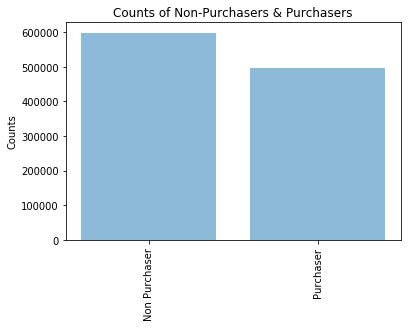

In [73]:
#Graph the purchaser/non purchasers
objects = ('Non Purchaser', 'Purchaser')
y_pos = np.arange(len(objects))
x = df['Purchaser'].value_counts()

_ = plt.bar(y_pos, x, align='center', alpha=0.5)
_ = plt.xticks(y_pos, objects, rotation=90)
_ = plt.ylabel('Counts')
_ = plt.title('Counts of Non-Purchasers & Purchasers')
plt.show()

In [74]:
#Determine the percentage of the file that are purchasers versus non purchasers
purchaser_df = df['Purchaser'].value_counts()
purchasers = float(purchaser_df[1])
non_purchasers = float(purchaser_df[0])
subscribers = float(len(df))
per_purchasers = float(purchasers/subscribers)
per_nonpurchasers = float(non_purchasers/subscribers)

#print('Number of Purchasers:', "{:,}".format(purchaser_df[1]))
#print('Number Non Purchasers:', "{:,}".format(purchaser_df[0]))
#print('Percentage of Purchasers:', "{:.2%}".format(per_purchasers))
#print('Percentage of Non Purchasers:', "{:.2%}".format(per_nonpurchasers))

In [75]:
#Create a new DataFrame for only the purchasers to use for exploring the behavior of the purchasers
buyers_df = df[df.Purchaser == 1]
print(buyers_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496535 entries, 18 to 1094637
Columns: 105 entries, Unnamed: 0 to Purchaser
dtypes: float64(97), int32(1), int64(7)
memory usage: 399.7 MB
None


In [76]:
print(buyers_df.ORDER_VALUE.describe())

count    496535.000000
mean        127.996365
std         230.497192
min           0.970000
25%          44.970000
50%          78.980000
75%         143.840000
max       51496.070000
Name: ORDER_VALUE, dtype: float64


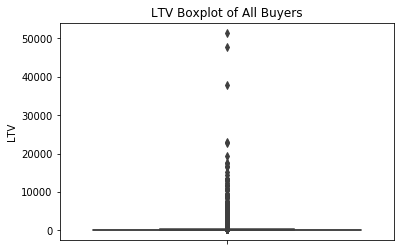

In [77]:
#Explore the LTV Data
_ = sns.boxplot(y = 'ORDER_VALUE', data=buyers_df)
_ = plt.ylabel('LTV')
_ = plt.title('LTV Boxplot of All Buyers')
plt.show()

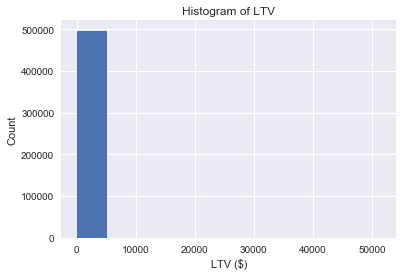

In [78]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df['ORDER_VALUE'])
_ = plt.title('Histogram of LTV')
_ = plt.xlabel('LTV ($)')
_ = plt.ylabel('Count')

plt.show()

In [79]:
#Split the buyers data into the bottom 75% and the top 25% and explore
buyers75percent_df = buyers_df[buyers_df.ORDER_VALUE <= 143.84]
print(buyers75percent_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372430 entries, 19 to 1094637
Columns: 105 entries, Unnamed: 0 to Purchaser
dtypes: float64(97), int32(1), int64(7)
memory usage: 299.8 MB
None


In [80]:
percent_of_buyers = len(buyers75percent_df)/len(buyers_df)
print('Percentage of Purchasers with LTV <= $143.84:',"{:.2%}".format(percent_of_buyers))

Percentage of Purchasers with LTV <= $143.84: 75.01%


In [81]:
buyerstop25percent_df = buyers_df[buyers_df.ORDER_VALUE > 143.84]
buyerstop25percent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124105 entries, 18 to 1094626
Columns: 105 entries, Unnamed: 0 to Purchaser
dtypes: float64(97), int32(1), int64(7)
memory usage: 99.9 MB


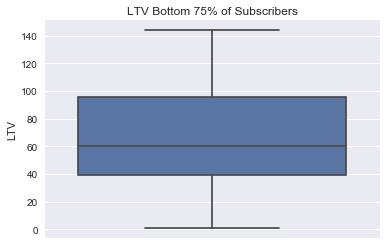

In [82]:
#Explore the LTV Data
_ = sns.boxplot(y = 'ORDER_VALUE', data=buyers75percent_df)
_ = plt.ylabel('LTV')
_ = plt.title('LTV Bottom 75% of Subscribers')
plt.show()

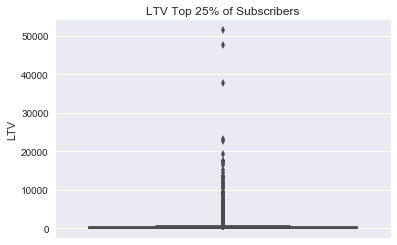

In [83]:
#Explore the LTV Data
_ = sns.boxplot(y = 'ORDER_VALUE', data=buyerstop25percent_df)
_ = plt.ylabel('LTV')
_ = plt.title('LTV Top 25% of Subscribers')
plt.show()

In [84]:
print(buyers75percent_df.ORDER_VALUE.describe())

count    372430.000000
mean         67.227553
std          33.421949
min           0.970000
25%          39.000000
50%          59.940000
75%          95.880000
max         143.840000
Name: ORDER_VALUE, dtype: float64


In [85]:
print(buyerstop25percent_df.ORDER_VALUE.describe())

count    124105.000000
mean        310.359111
std         406.048901
min         143.850000
25%         175.920000
50%         230.790000
75%         339.000000
max       51496.070000
Name: ORDER_VALUE, dtype: float64


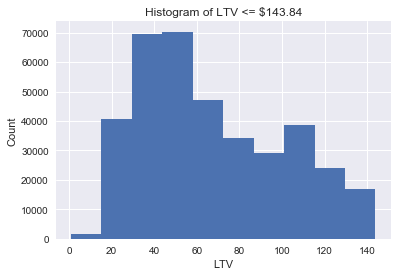

In [86]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers75percent_df['ORDER_VALUE'])
_ = plt.title('Histogram of LTV <= $143.84')
_ = plt.xlabel('LTV')
_ = plt.ylabel('Count')

plt.show()

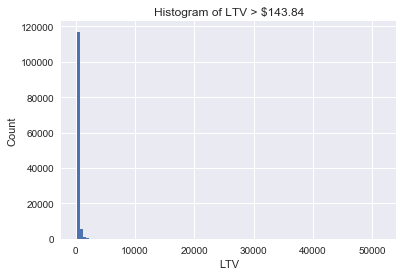

In [87]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyerstop25percent_df['ORDER_VALUE'], bins = 100)
_ = plt.title('Histogram of LTV > $143.84')
_ = plt.xlabel('LTV')
_ = plt.ylabel('Count')

plt.show()

In [88]:
#Create a DataFrame with the Outliers removed
P = np.percentile(buyers_df.ORDER_VALUE, [2.5, 97.5])
buyers_df2 = buyers_df[(buyers_df.ORDER_VALUE > P[0]) & (buyers_df.ORDER_VALUE < P[1])]
buyers_df2 = buyers_df2.drop(['Purchaser'], axis =1)
print(buyers_df2.info())
print(buyers_df2.ORDER_VALUE.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471377 entries, 18 to 1094637
Columns: 104 entries, Unnamed: 0 to PromoUsedPercentofOrders
dtypes: float64(97), int64(7)
memory usage: 377.6 MB
None
count    471377.000000
mean        110.830204
std          91.731640
min          19.980000
25%          47.940000
50%          79.000000
75%         136.960000
max         519.640000
Name: ORDER_VALUE, dtype: float64


In [89]:
#Percent of total list left once outliers are removed
percent_of_buyers2 = len(buyers_df2)/len(buyers_df)
print('Percentage of Purchasers Once Outliers Are Removed',"{:.2%}".format(percent_of_buyers2))

Percentage of Purchasers Once Outliers Are Removed 94.93%


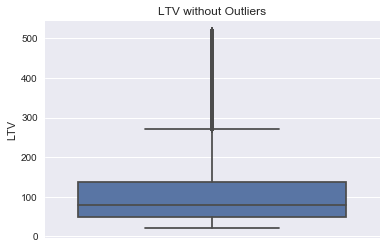

In [90]:
#Explore the LTV Data
_ = sns.boxplot(y = 'ORDER_VALUE', data=buyers_df2)
_ = plt.ylabel('LTV')
_ = plt.title('LTV without Outliers')
plt.show()

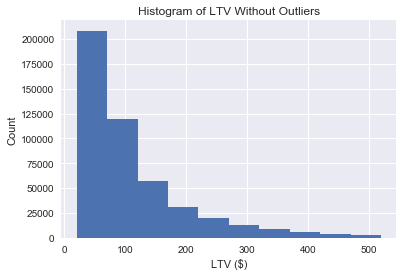

In [91]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df2['ORDER_VALUE'])
_ = plt.title('Histogram of LTV Without Outliers')
_ = plt.xlabel('LTV ($)')
_ = plt.ylabel('Count')

plt.show()

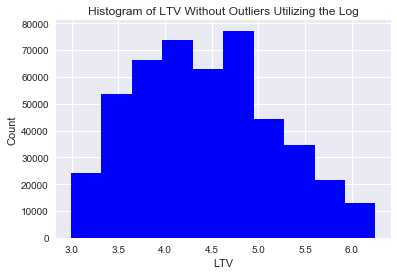

In [92]:
#Create a histogram to visualize LTV using the log
_ = plt.hist(np.log(buyers_df2['ORDER_VALUE']), color='b')
_ = plt.xlabel('LTV')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of LTV Without Outliers Utilizing the Log')
plt.show()

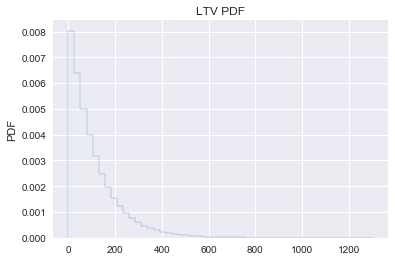

In [93]:
np.random.seed(42)

tau = np.mean(buyers_df2['ORDER_VALUE'])

#Draw out of an exponential distribution with parameter tau: LTV

inter_revenue = np.random.exponential(tau, 100000)

_ = plt.hist(inter_revenue, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('LTV PDF')
plt.show()

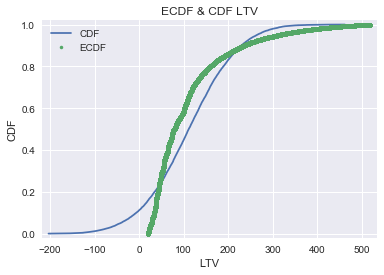

In [94]:
#Compute the ECDF for LTV Data:
ltv_mean = np.mean(buyers_df2['ORDER_VALUE'])
ltv_std = np.std(buyers_df2['ORDER_VALUE'])

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    return x, y

#Create the samples
samples = np.random.normal(ltv_mean, ltv_std, size=10000)

#Calculate the ECDF of the data and the samples
x_rev, y_rev = ecdf(buyers_df2['ORDER_VALUE'])
x_theor, y_theor = ecdf(samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_rev, y_rev, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('LTV')
_ = plt.ylabel('CDF')
_ = plt.title('ECDF & CDF LTV')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

In [95]:
buyers_df2.Frequency.describe()

count    471377.000000
mean          1.637886
std           1.140078
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          21.000000
Name: Frequency, dtype: float64

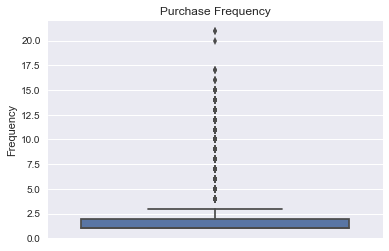

In [96]:
#Explore the Frequency Data
_ = sns.boxplot(y = 'Frequency', data=buyers_df2)
_ = plt.ylabel('Frequency')
_ = plt.title('Purchase Frequency')
plt.show()

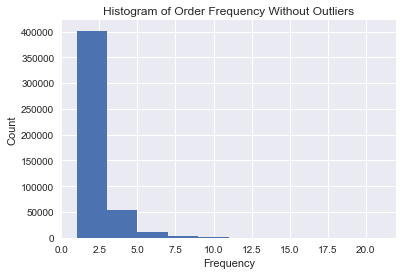

In [97]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df2['Frequency'])
_ = plt.title('Histogram of Order Frequency Without Outliers')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Count')

plt.show()

In [98]:
#Frequency stats
singleorderers = buyers_df2.loc[buyers_df2['Frequency'] == 1]
twoorderers = buyers_df2.loc[buyers_df2['Frequency'] == 2]
midfrequency = buyers_df2.loc[(buyers_df2['Frequency'] > 2) & (buyers_df2['Frequency'] < 10)]
highfrequency = buyers_df2.loc[buyers_df2['Frequency'] >= 10]

#print('Percentage of Purchasers that Are Single Buyers:',"{:.2%}".format(len(singleorderers)/len(buyers_df2)))
#print('Percentage of Purchasers that Are 2x Buyers:',"{:.2%}".format(len(twoorderers)/len(buyers_df2)))
#print('Percentage of Purchasers that Have Purchased 3 - 9 times:',"{:.2%}".format(len(midfrequency)/len(buyers_df2)))
#print('Percentage of Purchasers that Have Purchased 10+ times:',"{:.2%}".format(len(highfrequency)/len(buyers_df2)))

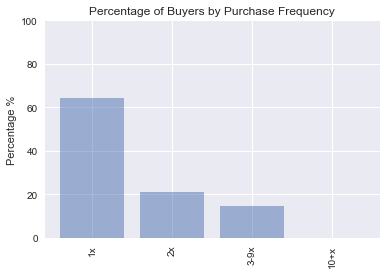

In [99]:
#Graph the yearly recency counts
objects = ('1x', '2x', '3-9x', '10+x')
y_pos = np.arange(len(objects))
frequencies = [((len(singleorderers)/len(buyers_df2))*100), ((len(twoorderers)/len(buyers_df2))*100), ((len(midfrequency)/len(buyers_df2))*100),((len(highfrequency)/len(buyers_df2))*100)]

_ = plt.bar(y_pos, frequencies, align='center', alpha=0.5)
_ = plt.xticks(y_pos, objects, rotation=90)
_ = plt.ylim(0,100)
_ = plt.ylabel('Percentage %')
_ = plt.title('Percentage of Buyers by Purchase Frequency')
#plt.show()

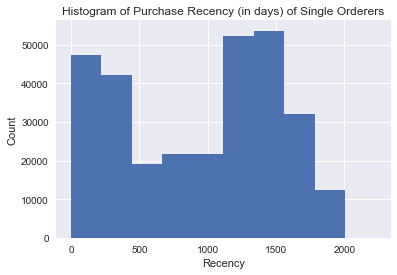

In [100]:
#Dig deeper into single purchasers
sns.set()
_ = plt.hist(singleorderers['Purch_Recency'])
_ = plt.title('Histogram of Purchase Recency (in days) of Single Orderers')
_ = plt.xlabel('Recency')
_ = plt.ylabel('Count')

plt.show()

In [101]:
#Dig deeper into single purchasers
single_1year = (singleorderers['SubscriberID'][(singleorderers['Purch_Recency'] <= 365)]).count()
#print('Percentage of Single Orderers Whose Most Recent Purchase 365 days or less (1 year):', "{:.2%}".format(single_1year/(len(singleorderers))))

In [102]:
buyers_df2.Purch_Recency.describe()

count    471377.000000
mean        853.235837
std         562.310197
min           0.000000
25%         317.000000
50%         851.000000
75%        1355.000000
max        2227.000000
Name: Purch_Recency, dtype: float64

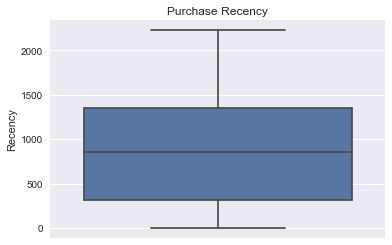

In [103]:
#Explore the Frequency Data
_ = sns.boxplot(y = 'Purch_Recency', data=buyers_df2)
_ = plt.ylabel('Recency')
_ = plt.title('Purchase Recency')
plt.show()

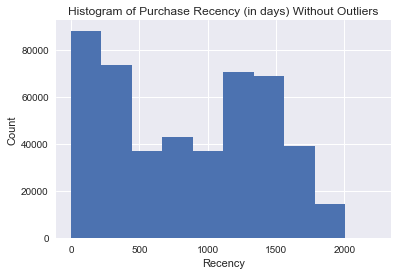

In [104]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df2['Purch_Recency'])
_ = plt.title('Histogram of Purchase Recency (in days) Without Outliers')
_ = plt.xlabel('Recency')
_ = plt.ylabel('Count')

plt.show()

In [105]:
one_year = (buyers_df2['SubscriberID'][(buyers_df2['Purch_Recency'] <= 365)]).count()
two_year = (buyers_df2['SubscriberID'][(buyers_df2['Purch_Recency'] > 365) & (buyers_df2['Purch_Recency'] <= 731)]).count()
three_year = (buyers_df2['SubscriberID'][(buyers_df2['Purch_Recency'] > 731) & (buyers_df2['Purch_Recency'] <= 1096)]).count()
four_year = (buyers_df2['SubscriberID'][(buyers_df2['Purch_Recency'] > 1096) & (buyers_df2['Purch_Recency'] <= 1461)]).count()
five_year = (buyers_df2['SubscriberID'][(buyers_df2['Purch_Recency'] > 1461) & (buyers_df2['Purch_Recency'] <= 1826)]).count()
sixplus_year = (buyers_df2['SubscriberID'][buyers_df2['Purch_Recency'] > 1826]).count()

total_recency = one_year + two_year + three_year + four_year + five_year + sixplus_year

num_subs = len(buyers_df2)
#print('RECENCY BREAKDOWN\n')
#print('Percentage of Buyers Most Recent Purchase 365 days or less (1 year):', "{:.2%}".format(one_year/num_subs))
#print('Percentage of Buyers Most Recent Purchase 366 to 731 days (2 years):', "{:.2%}".format(two_year/num_subs))
#print('Percentage of Buyers Most Recent Purchase 732 to 1,096 days (3 years):', "{:.2%}".format(three_year/num_subs))
#print('Percentage of Buyers Most Recent Purchase 1,097 to 1,461 days (4 years):', "{:.2%}".format(four_year/num_subs))
#print('Percentage of Buyers Most Recent Purchase 1,462 to 1,826 days (5 years):', "{:.2%}".format(five_year/num_subs))
#print('Percentage of Buyers Most Recent Purchase 1,827+ days (6+ years):', "{:.2%}".format(sixplus_year/num_subs))

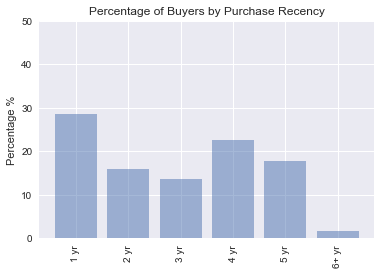

In [106]:
#Graph the yearly recency counts
objects = ('1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6+ yr')
y_pos = np.arange(len(objects))
rec = [((one_year/num_subs)*100), ((two_year/num_subs)*100), ((three_year/num_subs)*100),((four_year/num_subs)*100),((five_year/num_subs)*100),((sixplus_year/num_subs)*100)]

_ = plt.bar(y_pos, rec, align='center', alpha=0.5)
_ = plt.xticks(y_pos, objects, rotation=90)
_ = plt.ylim(0,50)
_ = plt.ylabel('Percentage %')
_ = plt.title('Percentage of Buyers by Purchase Recency')
#plt.show()

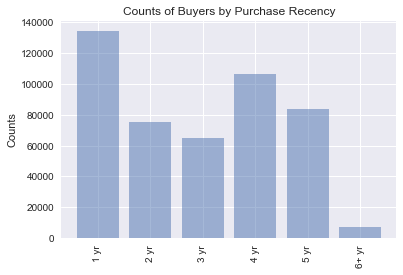

In [107]:
#Graph the yearly recency counts
objects = ('1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6+ yr')
y_pos = np.arange(len(objects))
sums = [one_year, two_year, three_year, four_year, five_year, sixplus_year]

_ = plt.bar(y_pos, sums, align='center', alpha=0.5)
_ = plt.xticks(y_pos, objects, rotation=90)
_ = plt.ylabel('Counts')
_ = plt.title('Counts of Buyers by Purchase Recency')
#plt.show()

In [108]:
buyers_df2.AOV.describe()

count    471377.000000
mean         69.961742
std          44.293702
min           9.990000
25%          39.160000
50%          56.910000
75%          89.000000
max         519.540000
Name: AOV, dtype: float64

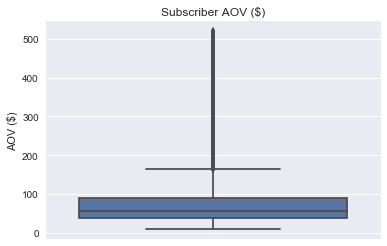

In [109]:
#Explore the AOV Data
_ = sns.boxplot(y = 'AOV', data=buyers_df2)
_ = plt.ylabel('AOV ($)')
_ = plt.title('Subscriber AOV ($)')
plt.show()

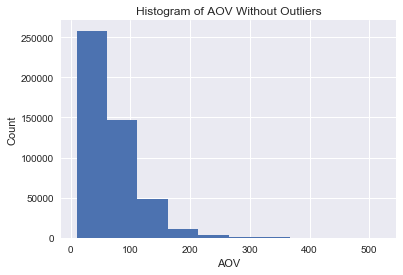

In [110]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df2['AOV'])
_ = plt.title('Histogram of AOV Without Outliers')
_ = plt.xlabel('AOV')
_ = plt.ylabel('Count')

plt.show()

In [111]:
buyers_df2.UPT.describe()

count    471377.000000
mean          2.339251
std           1.387407
min           1.000000
25%           1.250000
50%           2.000000
75%           3.000000
max          30.000000
Name: UPT, dtype: float64

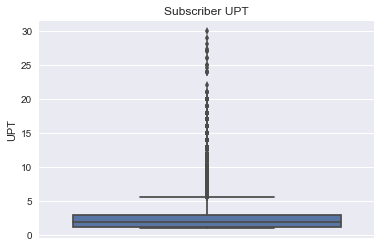

In [112]:
#Explore the UPT Data
_ = sns.boxplot(y = 'UPT', data=buyers_df2)
_ = plt.ylabel('UPT')
_ = plt.title('Subscriber UPT')
plt.show()

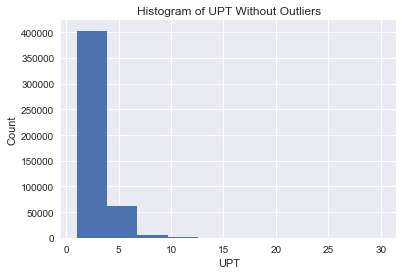

In [113]:
#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(buyers_df2['UPT'])
_ = plt.title('Histogram of UPT Without Outliers')
_ = plt.xlabel('UPT')
_ = plt.ylabel('Count')

plt.show()

In [115]:
#Understand how many buyers are active on the email list (meaning have an active status regardless of engagement)
#print('EMAIL STATUS\n')
#print('Percentage of Purchasers with Active Status on Email list:', 
      #"{:.2%}".format(buyers_df2['Email Active'].value_counts()[1]/len(buyers_df2)))
#print('Percentage of Purchasers with Held Status on Email list:', 
      #"{:.2%}".format(buyers_df2['Email Held'].value_counts()[1]/len(buyers_df2)))
#print('Percentage of Purchasers with Bounced Status on Email list:', 
      #"{:.2%}".format(buyers_df2['Email Bounced'].value_counts()[1]/len(buyers_df2)))
#print('Percentage of Purchasers Not Subscribed to Email list:', 
      #"{:.2%}".format(buyers_df2['Email Not Subscribed'].value_counts()[1]/len(buyers_df2)))

In [116]:
#Explore the Email Recency Data
nonopeners = buyers_df2.loc[buyers_df2['EmailOpen_Recency'] == 17556]
nonclickers = buyers_df2.loc[buyers_df2['EmailClick_Recency'] == 17556]
#print('Percent of Subscribers with 0 Opens in 6 Months:', "{:.2%}".format(nonopeners.EmailOpen_Recency.count()/len(buyers_df2)))
#print('Percent of Subscribers with 0 Clicks in 6 Months:', "{:.2%}".format(nonclickers.EmailClick_Recency.count()/len(buyers_df2)))

#print(len(buyers_df2))

In [117]:
buyers_df2['EmailOpeners'] = [0 if ele == 17556 else 1 for ele in buyers_df2['EmailOpen_Recency']]
buyers_df2['EmailClickers'] = [0 if ele == 17556 else 1 for ele in buyers_df2['EmailClick_Recency']]

buyers_df2 = buyers_df2.drop(['No State','Email Held','Email Not Subscribed', 'Email Bounced', 'FirstPurch_Recency','EmailOpen_Recency', 'EmailClick_Recency', 'OpenRate', 'ClickToOpenRate', 'ClickRate'], axis=1)
#print(buyers_df2.info())

In [119]:
#Dig into the Product Size Categories
adult = buyers_df2['Adult'].sum()
mbt = buyers_df2['Mens Big & Tall'].sum()
misses = buyers_df2['Misses'].sum()
nosize = buyers_df2['No Size'].sum()
plus = buyers_df2['Plus'].sum()
reg = buyers_df2['Regular'].sum()
kids = buyers_df2['Kids'].sum()
mreg = buyers_df2['Mens Regular'].sum()

objects = ('Adult', 'Mens B&T', 'Misses', 'No Size', 'Plus', 'Regular','Kids', 'Mens Regular')
y_pos = np.arange(len(objects))
sums = [adult, mbt, misses, nosize, plus, reg, kids, mreg]

#_ = plt.bar(y_pos, sums, align='center', alpha=0.5)
#_ = plt.xticks(y_pos, objects, rotation=90)
#_ = plt.ylabel('Sums')
#_ = plt.title('Sum of Products Purchased by Size Grouping')
#plt.show()

In [120]:
total_prods = adult + mbt + misses + nosize + plus + reg + kids + mreg
order_prod_qty = buyers_df2['ORDER_PRODUCT_QTY'].sum()
#print(total_prods)
#print(order_prod_qty)
#print('Percentage or Products Purchased in Mens Regular:', "{0:2%}".format(mreg/total_prods))

In [121]:
buyers_df2['Not Mens Regular'] = buyers_df2['Adult'] + buyers_df2['Mens Big & Tall'] + buyers_df2['Misses'] + buyers_df2['No Size'] + buyers_df2['Plus'] + buyers_df2['Regular'] + buyers_df2['Kids']
buyers_df2 = buyers_df2.drop(['Adult', 'Mens Big & Tall', 'Misses', 'No Size', 'Plus', 'Regular', 'Kids'], axis=1)
#print('Percent of Products Purchased Not Mens Regular:', "{0:2%}".format((buyers_df2['Not Mens Regular'].sum())/order_prod_qty))
#print('Percentage or Products Purchased in Mens Regular:', "{0:2%}".format(mreg/total_prods))

In [122]:
#Create percentage of products purchased by department instead of count
buyers_df2['Not Mens Reg %'] = buyers_df2['Not Mens Regular']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['Mens Reg %'] = buyers_df2['Mens Regular']/buyers_df2['ORDER_PRODUCT_QTY']

#print(buyers_df2[['Mens Regular', 'Not Mens Regular', 'ORDER_PRODUCT_QTY', 'Not Mens Reg %', 'Mens Reg %']].tail())

In [123]:
#Dig into the Product Department
boys = buyers_df2['PD Boys'].sum()
girls = buyers_df2['PD Girls'].sum()
men = buyers_df2['PD Men'].sum()
unisex = buyers_df2['PD Unisex'].sum()
women = buyers_df2['PD Women'].sum()
nodept = buyers_df2['No Dept'].sum()

objects2 = ('Boys', 'Girls', 'Men', 'Unisex', 'Women', 'No Dept')
y_pos2 = np.arange(len(objects2))
sums2 = [boys, girls, men, unisex, women, nodept]

#_ = plt.bar(y_pos2, sums2, align='center', alpha=0.5)
#_ = plt.xticks(y_pos2, objects2, rotation=90)
#_ = plt.ylabel('Sums')
#_ = plt.title('Sum of Products Purchased by Product Deptartment')
#plt.show()

In [124]:
total_prods2 = boys + girls + men + women + unisex + nodept
#print(total_prods2)
#print(order_prod_qty)
#print('Percentage or Products Purchased in Mens Department:', "{0:2%}".format(men/order_prod_qty))

In [125]:
#Roll up counts for products purchased in any department other than Mens into a PD Not Men column and drop the others
buyers_df2['PD Not Men'] = buyers_df2['PD Boys'] + buyers_df2['PD Girls'] + buyers_df2['PD Unisex'] + buyers_df2['PD Women'] + buyers_df2['No Dept']
buyers_df2 = buyers_df2.drop(['PD Boys', 'PD Girls', 'PD Unisex', 'PD Women', 'No Dept'], axis=1)
#print('Percentage or Products Purchased in PD Men:', "{0:2%}".format(men/order_prod_qty))
#print('Percent of Products Purchased PD Not Men:', "{0:2%}".format((buyers_df2['PD Not Men'].sum())/order_prod_qty))

In [126]:
#Create percentage of products purchased by department instead of count
buyers_df2['PD Not Men %'] = buyers_df2['PD Not Men']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['PD Men %'] = buyers_df2['PD Men']/buyers_df2['ORDER_PRODUCT_QTY']

#print(buyers_df2[['PD Men', 'PD Not Men', 'ORDER_PRODUCT_QTY', 'PD Not Men %', 'PD Men %']].tail())

In [128]:
#Dig into the Product Category Data
acc = buyers_df2['Category: Accessories'].sum()
inftodd = buyers_df2['Category: Infants & Toddlers'].sum()
nocat = buyers_df2['No Category'].sum()
shirts = buyers_df2['Category: Shirts'].sum()
jackets = buyers_df2['Category: Jackets/Outerwear'].sum()
dresses = buyers_df2['Category: Dresses/Skirts/Bodysuits/Rompers'].sum()
jeanspants = buyers_df2['Category: Jeans/Pants/Overalls/Shorts'].sum()

objects3 = ('Accessories', 'Infants/Toddlers', 'No Category', 'Shirts', 'Jackets/Outerwear', 'Dresses/etc', 'Jeans/Pants/Overalls/Shorts')
y_pos3 = np.arange(len(objects3))
sums3 = [acc, inftodd, nocat, shirts, jackets, dresses, jeanspants]

#_ = plt.bar(y_pos3, sums3, align='center', alpha=0.5)
#_ = plt.xticks(y_pos3, objects3, rotation=90)
#_ = plt.ylabel('Sums')
#_ = plt.title('Sum of Products Purchased by Product Category')
#plt.show()


In [129]:
total_prods3 = acc + inftodd + nocat + shirts + jackets + dresses + jeanspants
#print(total_prods3)
#print(order_prod_qty)
#print('Percentage or Products Purchased in Jeans/Pants/Overalls/Shorts:', "{0:2%}".format(jeanspants/total_prods3))

In [130]:
#Roll up counts for products purchased in any category other than jeans/pants/overalls/shorts into a Category: Other column and drop the others
buyers_df2['Category: Other'] = buyers_df2['Category: Accessories'] + buyers_df2['Category: Infants & Toddlers'] + buyers_df2['No Category'] + buyers_df2['Category: Shirts'] + buyers_df2['Category: Jackets/Outerwear'] + buyers_df2['Category: Dresses/Skirts/Bodysuits/Rompers']
buyers_df2 = buyers_df2.drop(['Category: Accessories', 'Category: Infants & Toddlers', 'No Category', 'Category: Shirts', 'Category: Jackets/Outerwear', 'Category: Dresses/Skirts/Bodysuits/Rompers'], axis=1)
#print('Percentage or Products Purchased in Jeans/Pants/Overalls/Shorts:', "{0:2%}".format(jeanspants/total_prods3))
#print('Percent of Products Purchased in Other Categories:', "{0:2%}".format((buyers_df2['Category: Other'].sum())/order_prod_qty))

In [131]:
#Create percentage of products purchased by category instead of count
buyers_df2['Category %: Other'] = buyers_df2['Category: Other']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['Category %: Jeans/Pants/Overalls/Shorts'] = buyers_df2['Category: Jeans/Pants/Overalls/Shorts']/buyers_df2['ORDER_PRODUCT_QTY']

#print(buyers_df2[['Category: Other', 'Category: Jeans/Pants/Overalls/Shorts', 'ORDER_PRODUCT_QTY', 'Category %: Jeans/Pants/Overalls/Shorts', 'Category %: Other']].tail())

In [133]:
#Dig into the Product Category Data
jc = buyers_df2['Brand JC'].sum()
pg = buyers_df2['Brand PG'].sum()
rw = buyers_df2['Brand RW'].sum()
br = buyers_df2['Brand Reg'].sum()
ac = buyers_df2['Brand AC'].sum()
fs = buyers_df2['Brand FS'].sum()
ow = buyers_df2['Brand OW'].sum()
rgs = buyers_df2['Brand R'].sum()
gen = buyers_df2['Brand Gen'].sum()
nb = buyers_df2['No Brand'].sum()
tc = buyers_df2['Brand TC'].sum()
we = buyers_df2['Brand W'].sum()

objects4 = ('Brand JC', 'Brand PG', 'Brand RW', 'Brand Reg', 'Brand AC', 'Brand FS', 'Brand OW', 'Brand R', 'Brand Gen', 'No Brand', 'Brand TC', 'Brand W')
y_pos4 = np.arange(len(objects4))
sums4 = [jc, pg, rw, br, ac, fs, ow, rgs, gen, nb, tc, we]

#_ = plt.bar(y_pos4, sums4, align='center', alpha=0.5)
#_ = plt.xticks(y_pos4, objects4, rotation=90)
#_ = plt.ylabel('Sums')
#_ = plt.title('Sum of Products Purchased by Product Brand')
#plt.show()


In [134]:
total_prods4 = jc + pg + rw + br + ac + fs + ow + rgs + gen + nb + tc + we
#print(total_prods4)
#print(order_prod_qty)
#print('Percentage or Products Purchased Brand W:', "{0:2%}".format(fs/total_prods))

In [135]:
buyers_df2['Brand W %'] = buyers_df2['Brand W']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['Brand Reg %'] = buyers_df2['Brand Reg']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['Brand FS %'] = buyers_df2['Brand FS']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['No Brand %'] = buyers_df2['No Brand']/buyers_df2['ORDER_PRODUCT_QTY']
buyers_df2['Other Brands %'] = (buyers_df2['Brand JC'] + buyers_df2['Brand PG'] + buyers_df2['Brand RW'] + buyers_df2['Brand AC'] + buyers_df2['Brand OW'] + buyers_df2['Brand R'] + buyers_df2['Brand Gen'] + buyers_df2['Brand TC'])/buyers_df2['ORDER_PRODUCT_QTY']

#print(buyers_df2[['Brand W %', 'Brand Reg %', 'Brand FS %', 'No Brand %', 'Other Brands %']].head())

In [137]:
#Dig into the State Data
AK = buyers_df2['AK'].sum()
AL = buyers_df2['AL'].sum()
AR = buyers_df2['AR'].sum()
AZ = buyers_df2['AZ'].sum()
CA = buyers_df2['CA'].sum()
CO = buyers_df2['CO'].sum()
CT = buyers_df2['CT'].sum()
DC = buyers_df2['DC'].sum()
DE = buyers_df2['DE'].sum()
FL = buyers_df2['FL'].sum()
GA = buyers_df2['GA'].sum()
HI = buyers_df2['HI'].sum()
IA = buyers_df2['IA'].sum()
ID = buyers_df2['ID'].sum()
IL = buyers_df2['IL'].sum()
IN = buyers_df2['IN'].sum()
KS = buyers_df2['KS'].sum()
KY = buyers_df2['KY'].sum()
LA = buyers_df2['LA'].sum()
MA = buyers_df2['MA'].sum()
MD = buyers_df2['MD'].sum()
ME = buyers_df2['ME'].sum()
MI = buyers_df2['MI'].sum()
MN = buyers_df2['MN'].sum()
MO = buyers_df2['MO'].sum()
MS = buyers_df2['MS'].sum()
MT = buyers_df2['MT'].sum()
NC = buyers_df2['NC'].sum()
ND = buyers_df2['ND'].sum()
NE = buyers_df2['NE'].sum()
NH = buyers_df2['NH'].sum()
NJ = buyers_df2['NJ'].sum()
NM = buyers_df2['NM'].sum()
NV = buyers_df2['NV'].sum()
NY = buyers_df2['NY'].sum()
#No_State = buyers_df2['No State'].sum()
OH = buyers_df2['OH'].sum()
OK = buyers_df2['OK'].sum()
OR = buyers_df2['OR'].sum()
PA = buyers_df2['PA'].sum()
RI = buyers_df2['RI'].sum()
SC = buyers_df2['SC'].sum()
SD = buyers_df2['SD'].sum()
TN = buyers_df2['TN'].sum()
TX = buyers_df2['TX'].sum()
UT = buyers_df2['UT'].sum()
VA = buyers_df2['VA'].sum()
VT = buyers_df2['VT'].sum()
WA = buyers_df2['WA'].sum()
WI = buyers_df2['WI'].sum()
WV = buyers_df2['WV'].sum()
WY = buyers_df2['WY'].sum()

objects5 = ('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY')
y_pos5 = np.arange(len(objects5))
sums5 = [AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY]

#_ = plt.figure(figsize=(20,10))
#_ = plt.bar(y_pos5, sums5, align='center', alpha=0.5)
#_ = plt.xticks(y_pos5, objects5, rotation=90)
#_ = plt.ylabel('Sums')
#_ = plt.title('Sum of Orders Purchased by State')
#plt.show()

In [138]:
total_orders_state = AK + AL + AR + AZ + CA + CO + CT + DC + DE + FL + GA + HI + IA + ID + IL + IN + KS + KY + LA + MA + MD + ME + MI + MN + MO + MS + MT + NC + ND + NE + NH + NJ + NM + NV + NY + OH + OK + OR + PA + RI + SC + SD + TN + TX + UT + VA + VT + WA + WI + WV + WY
total_orders = buyers_df2['Frequency'].sum()
#print(total_orders_state)
#print(total_orders)
#print('Percentage of Orders from Texas:', "{0:2%}".format(TX/total_orders))
#print('Percentage of Orders from California:', "{0:2%}".format(CA/total_orders))

In [139]:
#Create Five Regions for the State date
buyers_df2['Northeast Region'] = buyers_df2['DC'] + buyers_df2['ME'] + buyers_df2['NH'] + buyers_df2['VT'] + buyers_df2['CT'] + buyers_df2['NY'] + buyers_df2['PA'] + buyers_df2['DE'] + buyers_df2['MD'] + buyers_df2['RI'] + buyers_df2['MA'] + buyers_df2['NJ']
buyers_df2['Southeast Region'] = buyers_df2['WV'] + buyers_df2['VA'] + buyers_df2['KY'] + buyers_df2['NC'] + buyers_df2['SC'] + buyers_df2['TN'] + buyers_df2['FL'] + buyers_df2['GA'] + buyers_df2['AL'] + buyers_df2['MS'] + buyers_df2['AR'] + buyers_df2['LA']
buyers_df2['Midwest Region'] = buyers_df2['MI'] + buyers_df2['MN'] + buyers_df2['OH'] + buyers_df2['IN'] + buyers_df2['IL'] + buyers_df2['WI'] + buyers_df2['IA'] + buyers_df2['MO'] + buyers_df2['KS'] + buyers_df2['NE'] + buyers_df2['ND'] + buyers_df2['SD']
buyers_df2['Southwest Region'] = buyers_df2['OK'] + buyers_df2['TX'] + buyers_df2['NM'] + buyers_df2['AZ']
buyers_df2['West Region'] = buyers_df2['MT'] + buyers_df2['WY'] + buyers_df2['ID'] + buyers_df2['CO'] + buyers_df2['UT'] + buyers_df2['NV'] + buyers_df2['WA'] + buyers_df2['CA'] + buyers_df2['OR'] + buyers_df2['HI'] + buyers_df2['AK']

buyers_df2 = buyers_df2.drop(['Brand JC', 'Brand PG', 'Brand RW', 'Brand Reg', 'Brand AC', 'Brand FS', 'Brand OW', 'Brand R', 'Brand Gen', 'No Brand', 'Brand TC', 'Brand W','PD Men','PD Not Men','Category: Other','Category: Jeans/Pants/Overalls/Shorts', 'Mens Regular', 'Not Mens Regular','AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], axis =1)
#print(buyers_df2['Northeast Region'].sum())
#print(buyers_df2['Southeast Region'].sum())
#print(buyers_df2['Midwest Region'].sum())
#print(buyers_df2['Southwest Region'].sum())
#print(buyers_df2['West Region'].sum())

In [140]:
buyers_df2.to_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\buyers_df2.csv')

# Clustering

In [141]:
#Import Buyers 2 file
df = pd.read_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\buyers_df2.csv', header=0)

#Check the fields for each
#print(df.info())
#print(df.head())

In [142]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
#print(df.head())

In [143]:
df = df.set_index('SubscriberID')
#print(df.head())

In [144]:
#Store features in an array
X = np.array(df)
header = df.columns

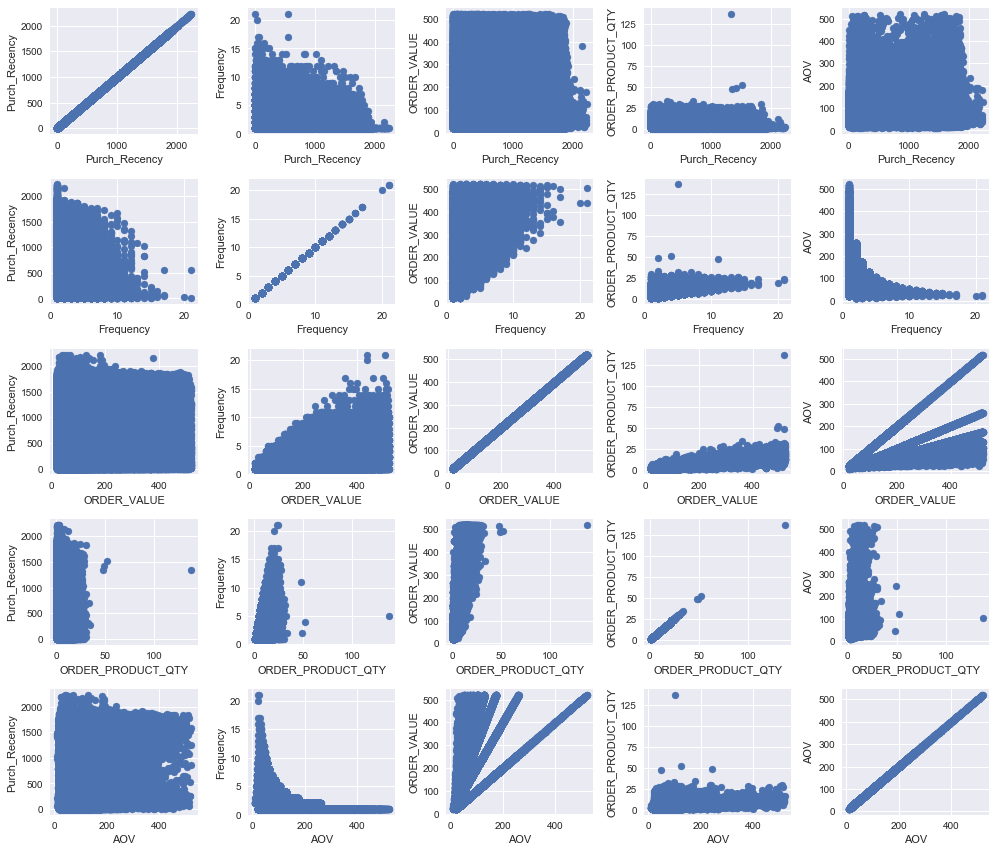

In [145]:
#Create scatterplots
fig = plt.figure(figsize=(14, 12))
feat_comb_1 = [1, 2, 3, 4, 5]
feat_comb_2 = [1, 2, 3, 4, 5]

nfeat = len(feat_comb_1)

for a,j in enumerate(feat_comb_1):
    for b,k in enumerate(feat_comb_2):
        plt.subplot(nfeat, nfeat, b + 1 + a * nfeat)
        plt.scatter(X[:, j], X[:, k])
        plt.xlabel(header[j])
        plt.ylabel(header[k])
        fig.tight_layout()

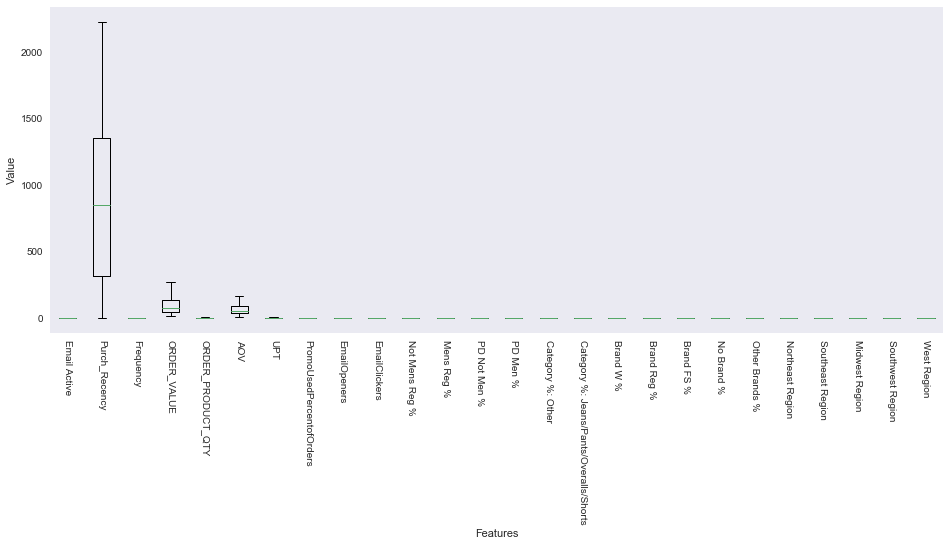

In [146]:
#Create boxplot for each feature
fig, axes = plt.subplots(figsize=(16, 6))
bp = plt.boxplot(X)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

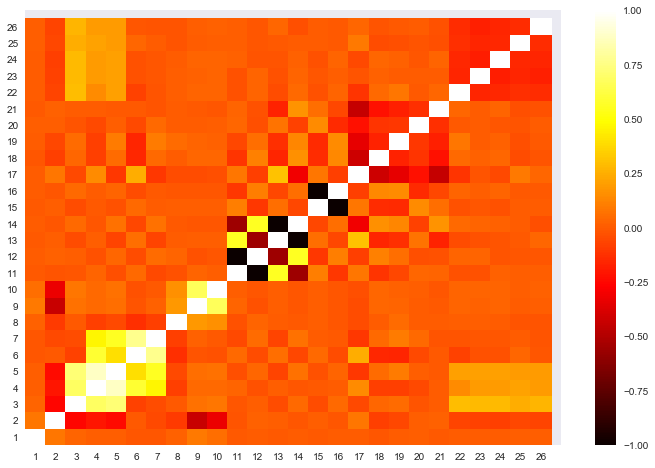

In [147]:
#Create correlation visual
fig = plt.figure(figsize=(12, 8))
correlation_matrix = np.corrcoef(X, rowvar=0)

plt.pcolor(correlation_matrix, cmap='hot', vmin=-1, vmax=1)
plt.colorbar()

# Put the major ticks at the middle of each cell.
plt.yticks(np.arange(0.5, 27), range(1, 27))
plt.xticks(np.arange(0.5, 27), range(1, 27))

plt.show()

In [148]:
#Scale the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

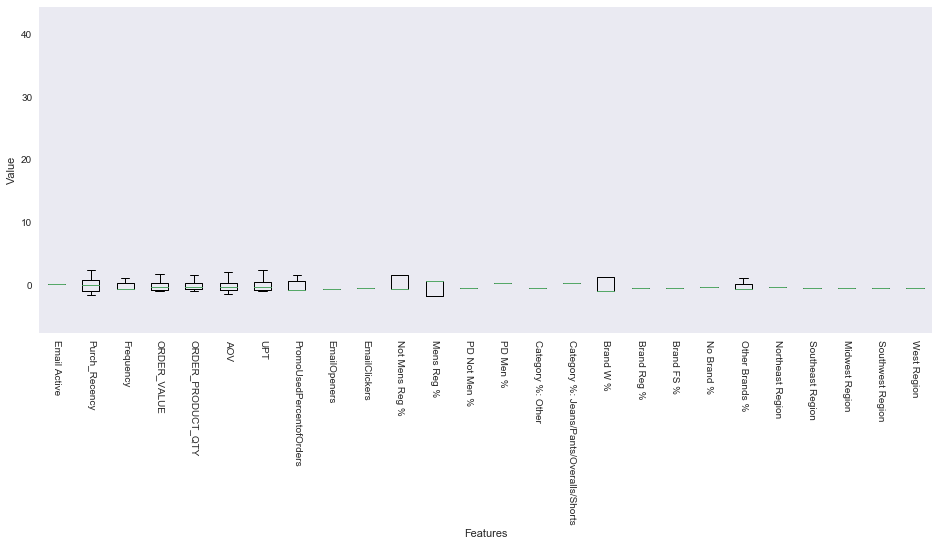

In [149]:
#Redo the boxplots on the scaled data
fig, axes = plt.subplots(figsize=(16, 6))
bp = plt.boxplot(X_scaled)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

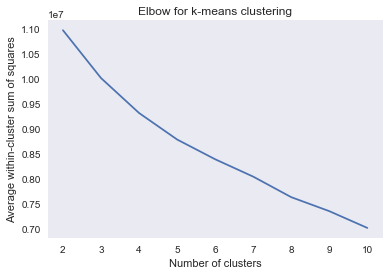

In [150]:
#Elbow Curve Option 1 for Finding Optimal k
cluster_averaged_distances = []

for K in range(2, 11):
    clf = KMeans(n_clusters=K, init='k-means++')
    clf.fit(X_scaled)
    cluster_averaged_distances.append(clf.inertia_)
               
plt.plot(range(2, 11), cluster_averaged_distances)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for k-means clustering')  
plt.show()

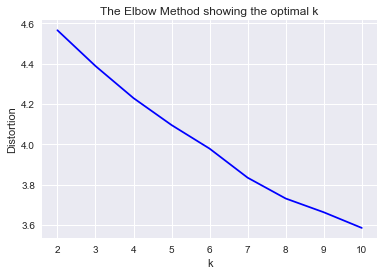

In [151]:
#Elbow Curve Option 2 for Finding Optimal k
k_range = range(2,11)
distortions = []

for k in k_range:
    model = KMeans(n_clusters = k, init='k-means++')
    model.fit(X_scaled)
    center = model.cluster_centers_
    distortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

plt.plot(k_range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [152]:
#Predict the cluster for each subscriber
cluster = KMeans(n_clusters= 8)
df['cluster'] = cluster.fit_predict(X_scaled)
labels = cluster.labels_

2    101548
4     78145
1     61480
6     50506
5     48201
3     47331
0     42185
7     41981
Name: cluster, dtype: int64


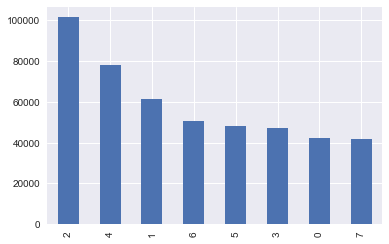

In [153]:
#Creative a bar graph of counts for each cluster
print(df.cluster.value_counts())
df.cluster.value_counts().plot(kind = 'bar')

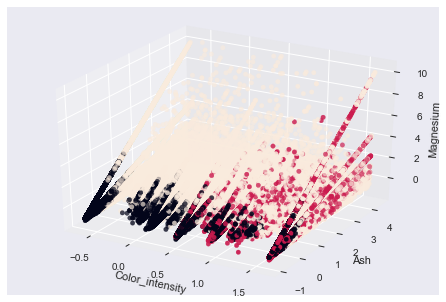

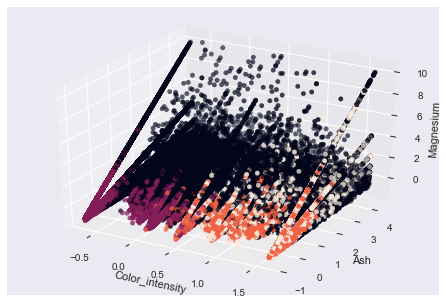

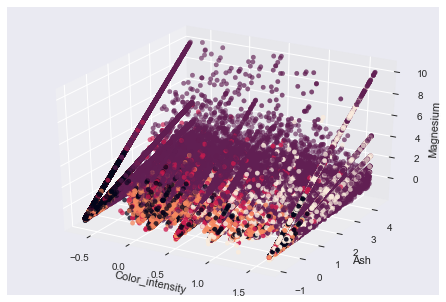

In [154]:
#Visualize the data

for i in range(3,6):
    clf = KMeans(n_clusters=i)

    clf.fit(X_scaled)

    labels = clf.predict(X_scaled)

    fig = plt.figure(i-2)
    ax = Axes3D(fig)
    ax.scatter(X_scaled[:,10], X_scaled[:,3], X_scaled[:, 5], zdir='z', s=20, c=labels, depthshade=True)
    ax.set_xlabel('Color_intensity')
    ax.set_ylabel('Ash')
    ax.set_zlabel('Magnesium')

    plt.show()

In [155]:
nrow, ncol = X_scaled.shape

print(nrow)
print(ncol)

471377
26


In [156]:
#PCA
desired_components=8 # project from 32 to 3 dimensions. What this means, is that we select the 3 dimensions of highest variance
pca = PCA(n_components = desired_components)
Xscores = pca.fit(X_scaled).transform(X_scaled)

# We can verify the number of principal components in this case
Xscores.shape

(471377, 8)

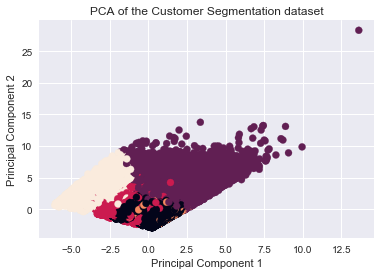

In [157]:
#Plot first two Principal Components using the PC scores

principle_component_data=[Xscores[:,i] for i in range(desired_components)]

plt.scatter(principle_component_data[0],principle_component_data[1],c=labels)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Customer Segmentation dataset')
plt.show()

[]

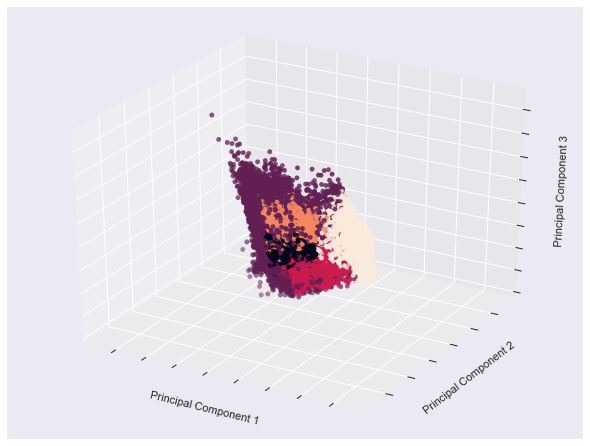

In [158]:
#PCA 3D

fig = plt.figure(figsize=(8,6))

ax = Axes3D(fig, elev=-150, azim=60)#play with the viewing angle by changing these numbers
ax.scatter(principle_component_data[0], principle_component_data[1], principle_component_data[2], c=labels)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.w_zaxis.set_ticklabels([])

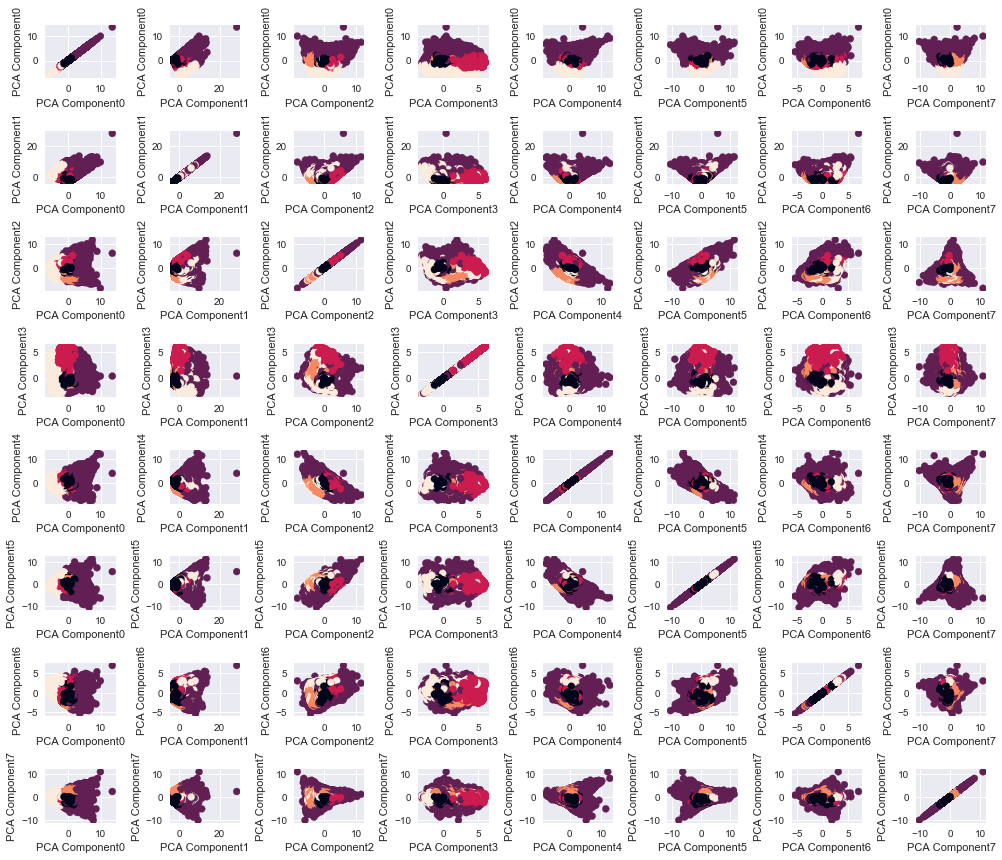

In [159]:
fig = plt.figure(figsize=(14,12))

for j in range(desired_components):
    for k in range(desired_components):
        plt.subplot(desired_components, desired_components, j+1+k*desired_components)
        plt.scatter(principle_component_data[j], principle_component_data[k], c=labels)
        plt.xlabel("PCA Component%d"%j)
        plt.ylabel("PCA Component%d"%k)
fig.tight_layout()

In [160]:
pca = PCA().fit(X_scaled)
pca.explained_variance_ratio_

array([  1.32119257e-01,   1.26841535e-01,   8.42636853e-02,
         7.82395357e-02,   6.34618870e-02,   5.91191590e-02,
         4.76930621e-02,   4.61285702e-02,   4.56072616e-02,
         4.38057174e-02,   4.36415829e-02,   4.13351311e-02,
         4.03885240e-02,   3.79349722e-02,   3.47556265e-02,
         2.72521537e-02,   2.39229099e-02,   1.20354279e-02,
         7.00716501e-03,   3.63997247e-03,   8.06863703e-04,
         1.55434612e-30,   1.24936828e-31,   1.79159320e-33,
         8.44122691e-34,   4.74946853e-34])

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


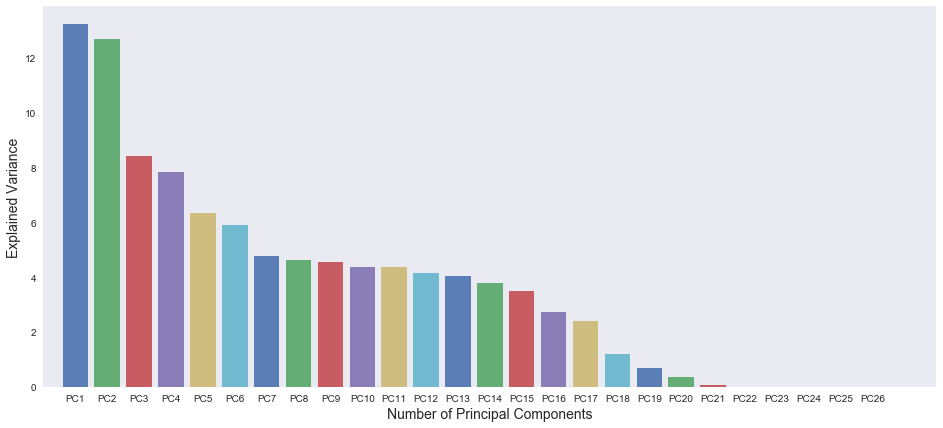

In [161]:
fig = plt.figure(figsize=(16,7))

bar_labels = ['PC%s' %i for i in range(1,ncol+1)]
#bar_labels
x_pos = list(range(len(bar_labels)))
for i in range(ncol):
    plt.bar(left=i, height=pca.explained_variance_ratio_[i]*100, align='center', alpha=0.9)
plt.xticks(x_pos, bar_labels)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.xlim(-1, 27)
plt.grid()

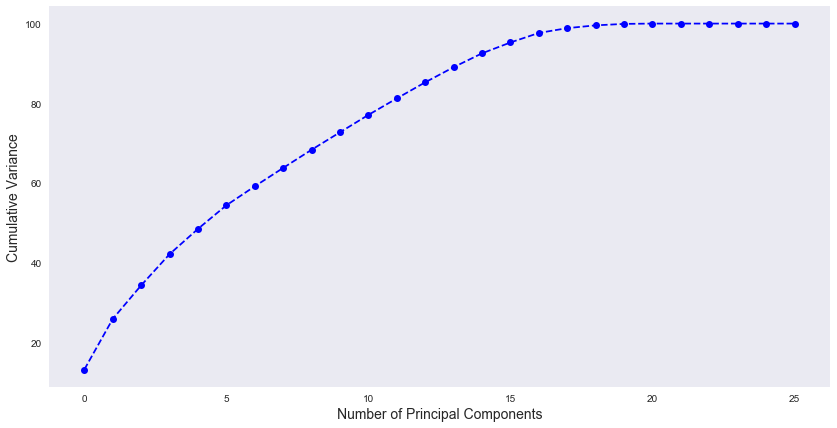

In [162]:
fig = plt.figure(figsize=(14,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_*100), '--bo')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Variance', fontsize=14)
plt.grid()

In [163]:
#print(df.head())

In [164]:
#df.to_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\buyers_df2_clusters.csv')

# Cluster EDA

In [165]:
#Import Cluster file
df = pd.read_csv(r'C:\Users\jrenaud\Documents\Springboard\Project 2\Data Outputs\\buyers_df2_clusters.csv', header=0)
#print(df.head())
#print(df.info())

In [166]:
df.cluster.value_counts()

2    101548
4     78145
1     61480
6     50506
5     48201
3     47331
0     42185
7     41981
Name: cluster, dtype: int64

In [167]:
#Baseline totals
#print(df[['Frequency','Northeast Region', 'Southeast Region','Midwest Region', 'Southwest Region', 'West Region']].sum())
total_rev = df['ORDER_VALUE'].sum()
#print('Total Revenue:','${:,.2f}'.format(total_rev))
total_orders = df['ORDER_PRODUCT_QTY'].sum()
#print('Total Orders:','{:,.0f}'.format(total_orders))
promo_use = df['PromoUsedPercentofOrders'].mean()
#print('Average % of Orders a Promo was Used:', "{:.2%}".format(promo_use))
avg_rec = df['Purch_Recency'].mean()
#print('Average Purchase Recency:', '{:.0f}'.format(avg_rec))
avg_ltv = df['ORDER_VALUE'].mean()
#print('Average LTV:','${:,.2f}'.format(avg_ltv))

In [169]:
#Averages by Cluster for Purchase Data (RFM, AOV, UPT, Promo Usage)
#df.groupby('cluster', as_index=False)['ORDER_VALUE', 'Purch_Recency', 'Frequency', 'ORDER_PRODUCT_QTY', 'AOV', 'UPT', 'PromoUsedPercentofOrders'].mean()

In [170]:
#Email "Active" counts by cluster (1 = Active in ESP, 0 = Inactive in ESP) Note: this doesn't represent their opted in status for email (just if the email address is emailable, i.e. not held, bounced)
df.groupby(['cluster', 'Email Active']).size().unstack(fill_value=0)

Email Active,0,1
cluster,,
0,199,41986
1,2391,59089
2,3877,97671
3,1311,46020
4,3419,74726
5,1721,46480
6,2030,48476
7,1537,40444


In [171]:
#Has the subscriber opened at least 1 email in the last 6 months? 1 = yes/0 = no
df.groupby(['cluster', 'EmailOpeners']).size().unstack(fill_value=0)

EmailOpeners,0,1
cluster,,
0,640,41545
1,54128,7352
2,92073,9475
3,35748,11583
4,68087,10058
5,36842,11359
6,43749,6757
7,33839,8142


In [172]:
#Has the subscriber clicked at least 1 email in the last 6 months? 1 = yes/0 = no 
df.groupby(['cluster', 'EmailClickers']).size().unstack(fill_value=0)

EmailClickers,0,1
cluster,,
0,104,42081
1,61319,161
2,101467,81
3,41997,5334
4,77997,148
5,42089,6112
6,50317,189
7,38019,3962


In [174]:
#Explore the product purchase behavior by cluster. What is the average % of products purchased for Size Category, Product Dept, Category, Brand
#df.groupby('cluster', as_index=False)['Mens Reg %','Not Mens Reg %', 'PD Men %', 'PD Not Men %', 
       #'Category %: Jeans/Pants/Overalls/Shorts','Category %: Other',
       #'Brand W %', 'Brand Reg %', 'Brand FS %', 'No Brand %',
       #'Other Brands %'].mean()

In [175]:
#What region of the country are the clusters orders coming from
#df.groupby('cluster', as_index=False)['Frequency','Northeast Region', 'Southeast Region','Midwest Region', 'Southwest Region', 'West Region'].sum()

In [176]:
cluster0 = df.loc[df['cluster'] == 0].reset_index().drop(['index', 'cluster'], axis = 1)
cluster1 = df.loc[df['cluster'] == 1].reset_index().drop(['index', 'cluster'], axis = 1)
cluster2 = df.loc[df['cluster'] == 2].reset_index().drop(['index', 'cluster'], axis = 1)
cluster3 = df.loc[df['cluster'] == 3].reset_index().drop(['index', 'cluster'], axis = 1)
cluster4 = df.loc[df['cluster'] == 4].reset_index().drop(['index', 'cluster'], axis = 1)
cluster5 = df.loc[df['cluster'] == 5].reset_index().drop(['index', 'cluster'], axis = 1)
cluster6 = df.loc[df['cluster'] == 6].reset_index().drop(['index', 'cluster'], axis = 1)
cluster7 = df.loc[df['cluster'] == 7].reset_index().drop(['index', 'cluster'], axis = 1)

#print(cluster1.head())

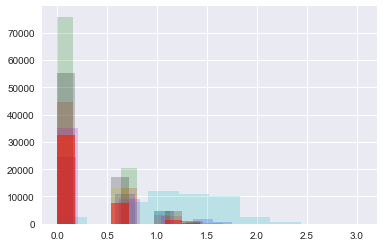

In [177]:
#Explore Recency differences for each cluster
_ = plt.hist(np.log(cluster0['Frequency']), alpha=0.2, bins=10, color='b')
_ = plt.hist(np.log(cluster1['Frequency']), alpha=0.2, bins=10, color='r')
_ = plt.hist(np.log(cluster2['Frequency']), alpha=0.2, bins=10, color='g')
_ = plt.hist(np.log(cluster3['Frequency']), alpha=0.2, bins=10, color='c')
_ = plt.hist(np.log(cluster4['Frequency']), alpha=0.2, bins=10, color='k')
_ = plt.hist(np.log(cluster5['Frequency']), alpha=0.2, bins=10, color='m')
_ = plt.hist(np.log(cluster6['Frequency']), alpha=0.2, bins=10, color='y')
_ = plt.hist(np.log(cluster7['Frequency']), alpha=0.5, bins=10, color='r')
plt.show()

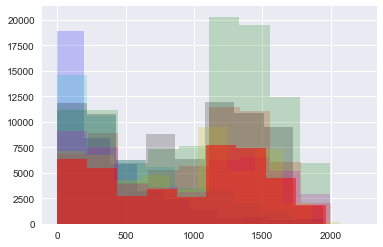

In [178]:
#Explore Monetary Value differences for each cluster
_ = plt.hist((cluster0['Purch_Recency']), alpha=0.2, bins=10, color='b')
_ = plt.hist((cluster1['Purch_Recency']), alpha=0.2, bins=10, color='r')
_ = plt.hist((cluster2['Purch_Recency']), alpha=0.2, bins=10, color='g')
_ = plt.hist((cluster3['Purch_Recency']), alpha=0.2, bins=10, color='c')
_ = plt.hist((cluster4['Purch_Recency']), alpha=0.2, bins=10, color='k')
_ = plt.hist((cluster5['Purch_Recency']), alpha=0.2, bins=10, color='m')
_ = plt.hist((cluster6['Purch_Recency']), alpha=0.2, bins=10, color='y')
_ = plt.hist((cluster7['Purch_Recency']), alpha=0.5, bins=10, color='r')
plt.show()

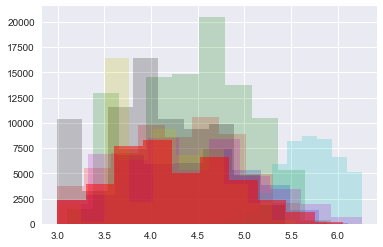

In [179]:
#Explore Monetary Value differences for each cluster
_ = plt.hist(np.log(cluster0['ORDER_VALUE']), alpha=0.2, bins=10, color='b')
_ = plt.hist(np.log(cluster1['ORDER_VALUE']), alpha=0.2, bins=10, color='r')
_ = plt.hist(np.log(cluster2['ORDER_VALUE']), alpha=0.2, bins=10, color='g')
_ = plt.hist(np.log(cluster3['ORDER_VALUE']), alpha=0.2, bins=10, color='c')
_ = plt.hist(np.log(cluster4['ORDER_VALUE']), alpha=0.2, bins=10, color='k')
_ = plt.hist(np.log(cluster5['ORDER_VALUE']), alpha=0.2, bins=10, color='m')
_ = plt.hist(np.log(cluster6['ORDER_VALUE']), alpha=0.2, bins=10, color='y')
_ = plt.hist(np.log(cluster7['ORDER_VALUE']), alpha=0.5, bins=10, color='r')
plt.show()

In [180]:
#Compare regional data by cluster
df_region = df[['Northeast Region', 'Southeast Region', 'Midwest Region', 'West Region', 'Southwest Region', 'cluster']].copy()
df_region = df_region.groupby('cluster').sum().reset_index()
#print(df_region)

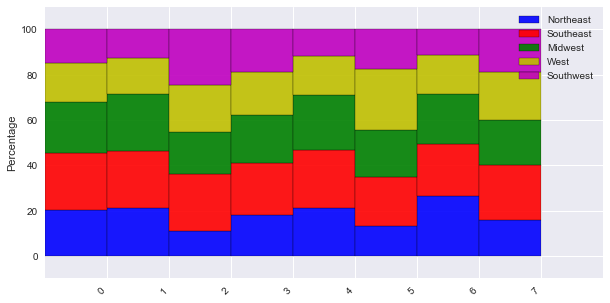

In [181]:
df_region['cluster'] = df_region['cluster'].astype(str)

f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1

bar_l = [i for i in range(len(df_region['Northeast Region']))]
tick_pos = [i+(bar_width/2) for i in bar_l]
totals = [i + j + k + l + m for i,j,k,l,m in zip(df_region['Northeast Region'], df_region['Southeast Region'],
                                               df_region['Midwest Region'], df_region['West Region'], 
                                               df_region['Southwest Region'])]
ne = [i/j * 100 for i,j in zip(df_region['Northeast Region'], totals)]
se = [i/j * 100 for i,j in zip(df_region['Southeast Region'], totals)]
mid = [i/j * 100 for i,j in zip(df_region['Midwest Region'], totals)]
we = [i/j * 100 for i,j in zip(df_region['West Region'], totals)]
sw = [i/j * 100 for i,j in zip(df_region['Southwest Region'], totals)]

ax.bar(bar_l, ne, label ='Northeast', alpha=0.9, color='b', width=bar_width, edgecolor='k')
ax.bar(bar_l, se, bottom=ne, label ='Southeast', alpha=0.9, color='r', width=bar_width, edgecolor='k')
ax.bar(bar_l, mid, bottom=[i+j for i,j in zip(ne, se)], label ='Midwest', alpha=0.9, color='g', width=bar_width, edgecolor='k')
ax.bar(bar_l, we, bottom=[i+j+k for i,j,k in zip(ne, se, mid)], label ='West', alpha=0.9, color='y', width=bar_width, edgecolor='k')
ax.bar(bar_l, sw, bottom=[i+j+k+l for i,j,k,l in zip(ne, se, mid, we)], label ='Southwest', alpha=0.9, color='m', width=bar_width, edgecolor='k')

plt.xticks(tick_pos, df_region['cluster'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
plt.show()

In [182]:
df_email = df[['EmailOpeners', 'EmailClickers', 'cluster']].copy()
df_email = df_email.groupby('cluster').sum().reset_index()
newCol = [42815, 61480, 101548, 47331, 78145, 48201, 50506, 41981]
newName = 'ClusterSize'
values = np.insert(df_email.values, df_email.shape[1], newCol, axis=1)
header = df_email.columns.values.tolist()
header.append(newName)
df_email = pd.DataFrame(values, columns=header)
df_email['EmailNonOpeners'] = df_email['ClusterSize'] - df_email['EmailOpeners']
df_email['EmailNonClickers'] = df_email['ClusterSize'] - df_email['EmailClickers']
print(df_email)

   cluster  EmailOpeners  EmailClickers  ClusterSize  EmailNonOpeners  \
0        0         41545          42081        42815             1270   
1        1          7352            161        61480            54128   
2        2          9475             81       101548            92073   
3        3         11583           5334        47331            35748   
4        4         10058            148        78145            68087   
5        5         11359           6112        48201            36842   
6        6          6757            189        50506            43749   
7        7          8142           3962        41981            33839   

   EmailNonClickers  
0               734  
1             61319  
2            101467  
3             41997  
4             77997  
5             42089  
6             50317  
7             38019  


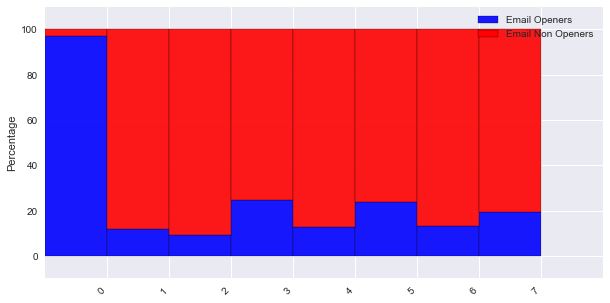

In [183]:
f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1

bar_l = [i for i in range(len(df_email['cluster']))]
tick_pos = [i+(bar_width/2) for i in bar_l]
totals = [i + j for i,j in zip(df_email['EmailOpeners'], df_email['EmailNonOpeners'])]
eo = [i/j * 100 for i,j in zip(df_email['EmailOpeners'], totals)]
eno = [i/j * 100 for i,j in zip(df_email['EmailNonOpeners'], totals)]

ax.bar(bar_l, eo, label ='Email Openers', alpha=0.9, color='b', width=bar_width, edgecolor='k')
ax.bar(bar_l, eno, bottom=eo, label ='Email Non Openers', alpha=0.9, color='r', width=bar_width, edgecolor='k')

plt.xticks(tick_pos, df_email['cluster'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
plt.show()

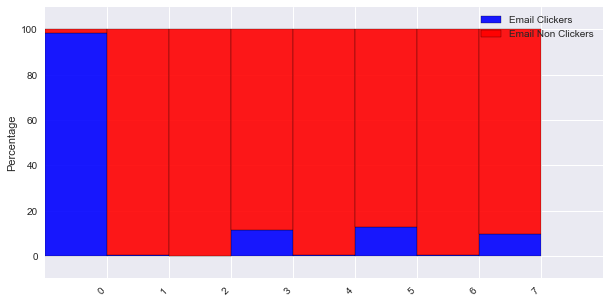

In [184]:
f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1

bar_l = [i for i in range(len(df_email['cluster']))]
tick_pos = [i+(bar_width/2) for i in bar_l]
totals = [i + j for i,j in zip(df_email['EmailClickers'], df_email['EmailNonClickers'])]
eo = [i/j * 100 for i,j in zip(df_email['EmailClickers'], totals)]
eno = [i/j * 100 for i,j in zip(df_email['EmailNonClickers'], totals)]

ax.bar(bar_l, eo, label ='Email Clickers', alpha=0.9, color='b', width=bar_width, edgecolor='k')
ax.bar(bar_l, eno, bottom=eo, label ='Email Non Clickers', alpha=0.9, color='r', width=bar_width, edgecolor='k')

plt.xticks(tick_pos, df_email['cluster'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
plt.show()